## 0.1. Imports


# STEP 0

In [123]:
import os
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
from datetime                  import datetime

## 0.2. Funções de apoio

In [124]:
# ===================================================================
# Configura o notebook
def jupyter_settings():
    import warnings
    warnings.filterwarnings('ignore')
    %matplotlib inline

    # Tamanho e estilo dos gráficos
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # Configuração de exibição das linhas e colunas do pandas
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    # configuração do pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()

# Imprime n gráficos do tipo boxplot lado a lado
def exibe_boxplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        sns.boxplot(data[coluna]).set(title=coluna)
        indice += 1


# Imprime n gráficos do tipo countplot lado a lado
def exibe_countplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        plt.xticks(rotation=90)
        sns.countplot(data=data, x=data[coluna]).set(title=coluna,  ylabel='Contagem', xlabel=None)
        indice += 1


def plota_ausentes(data, title, x_title, perc_minimo=0):
    """
    Plota uma tabela com a contagem de valores ausentes por coluna e um gráfico de
    barras com o percentual de ausentes por colunas caso existam dados ausentes,
    caso não, imprime o resultado de isna().sum()
    Params
    data: dataframe com os dados a serem plotados
    title: título do gráfico
    x_title: título do eixo x
    perc_minimo: percentual mínimo a ser plotado no gráfico
    """

    # Pega as colunas com dados ausentes
    colunas_com_nan = [col for col in data if data[col].isna().sum() > perc_minimo]

    # Plot do gráfico de barras com o percentual
    if len(colunas_com_nan) > 0:    # Se tiver colunas com dados faltantes
        ax = (  # Grafico                              
            data[colunas_com_nan]   # Dataframe a ser plotado no gráfico
            .isna() # Pegar valores faltantes
            .mean() # Pegar a média dos valores faltantes
            .sort_values(ascending=True)    # Ordenar os dados 
            .mul(100)   # multiplicar a média por 100 (percentual)
            .round(1)   # Arredondar as casas decimais para 1
            .plot(kind="barh")  # Tipo do gráfico (barras horizontais)
        )
        _ = ax.set_xlabel(x_title)  # Título do eixo x
        _ = ax.set_title(title) # Título do gráfico
        _ = ax.bar_label(ax.containers[0])  # Mostrar valores sobre as barras

        # Tabela da contagems dos dados faltantes
        print("Contagem de faltantes")
        print(data[colunas_com_nan].isna().sum().sort_values(ascending=True))
    else:   # Caso não exista dados faltantes imprime uma lista das colunas
        print('Contagem de faltantes')
        print(data.isna().sum())


def carrega_dados(caminho):
    lista_arquivos = os.listdir(caminho)
    lista_arquivos = [arquivo for arquivo in lista_arquivos if arquivo.endswith(".csv")]
    df_list = []

    for arquivo in lista_arquivos:
        caminho_arquivo = os.path.join(caminho, arquivo)
        # Tentar diferentes encodings
        try:
            df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='utf-8', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='latin-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
            except UnicodeDecodeError:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='iso-8859-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)
    df_unicos = df.drop_duplicates(keep='first')

    return df_unicos


## 0.3. Carregando os dados

In [125]:
tudo = "../dados/csv"
a2022 = "../dados/csv/2022"
a2023 = "../dados/csv/2023"
a2024 = "../dados/csv/2024"
        
ano_2022 = carrega_dados(a2022)
ano_2023 = carrega_dados(a2023)
ano_2024 = carrega_dados(a2024)

df = pd.concat([ano_2022, ano_2023, ano_2024], ignore_index=True)

# 1 - Entendimento dos dados


In [126]:
df.head(3)

,Urgenza,Data Accesso,Data Fine Contatto,Struttura,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Struttura di Ricovero/Trasferimento,Et&agrave;,Fast Track,Operatore Triagista,Sessione Ticket,Data Nascita
0,3,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,NaN,43.00,NaN,CRESCINI SONIA,803877.00,1982-11-19
1,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,NaN,47.00,NaN,MACALUSO LIBORIO FABIO,804837.00,1978-05-11
2,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,POMA LORENZO,Ricoverato,Dolore toracico,2022000003,POLONI ALBERTO,CARDIOLOGIA\rPRESIDIO OSPEDALIERO CHIARI,75.00,NaN,MACALUSO LIBORIO FABIO,803945.00,1950-09-29


## 1.1. Renomear as colunas

In [127]:
df.columns

Index(['Urgenza', 'Data Accesso', 'Data Fine Contatto', 'Struttura',
       'Paziente', 'Modalità Dimissione', 'Problema Principale',
       'Numero Scheda PS', 'Medico Dimettente',
       'Struttura di Ricovero/Trasferimento', 'Et&agrave;', 'Fast Track',
       'Operatore Triagista', 'Sessione Ticket', 'Data Nascita'],
      dtype='object')

## 1.2. Volumetria dos dados

In [128]:
# Conferindo a volumetria
print(f"Quantidade de colunas:  {df.shape[1]}")
print(f"Quantidade de linhas:   {df.shape[0]}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Quantidade de pazientes:{df['Paziente'].nunique()}")
print(f"Diferença pacientes por atendimento: {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Quantidade de colunas:  15
Quantidade de linhas:   160011
Cartões PS únicos:      159815
Quantidade de pazientes:82136
Diferença pacientes por atendimento: 196


## 1.3. Tipos dos dados

In [129]:
df.dtypes

Urgenza                                         int64
Data Accesso                           datetime64[ns]
Data Fine Contatto                     datetime64[ns]
Struttura                                      object
Paziente                                       object
Modalità Dimissione                            object
Problema Principale                            object
Numero Scheda PS                                int64
Medico Dimettente                              object
Struttura di Ricovero/Trasferimento            object
Et&agrave;                                    float64
Fast Track                                    float64
Operatore Triagista                            object
Sessione Ticket                               float64
Data Nascita                           datetime64[ns]
dtype: object

## 1.4. alterando o tipo dos dados

In [130]:
df['Sessione Ticket'] = df['Sessione Ticket'].astype('Int64')
df['Numero Scheda PS'] = df['Numero Scheda PS'].astype('str') 
# df['Data Accesso'] = pd.to_datetime(df['Data Accesso'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Fine Contatto'] = pd.to_datetime(df['Data Fine Contatto'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Nascita'] = pd.to_datetime(df['Data Nascita'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


## 1.5. Verificando dados faltantes


Contagem de faltantes
Et&agrave;                                  1
Data Nascita                                1
Problema Principale                         6
Sessione Ticket                          3955
Struttura di Ricovero/Trasferimento    142101
Fast Track                             160011
dtype: int64


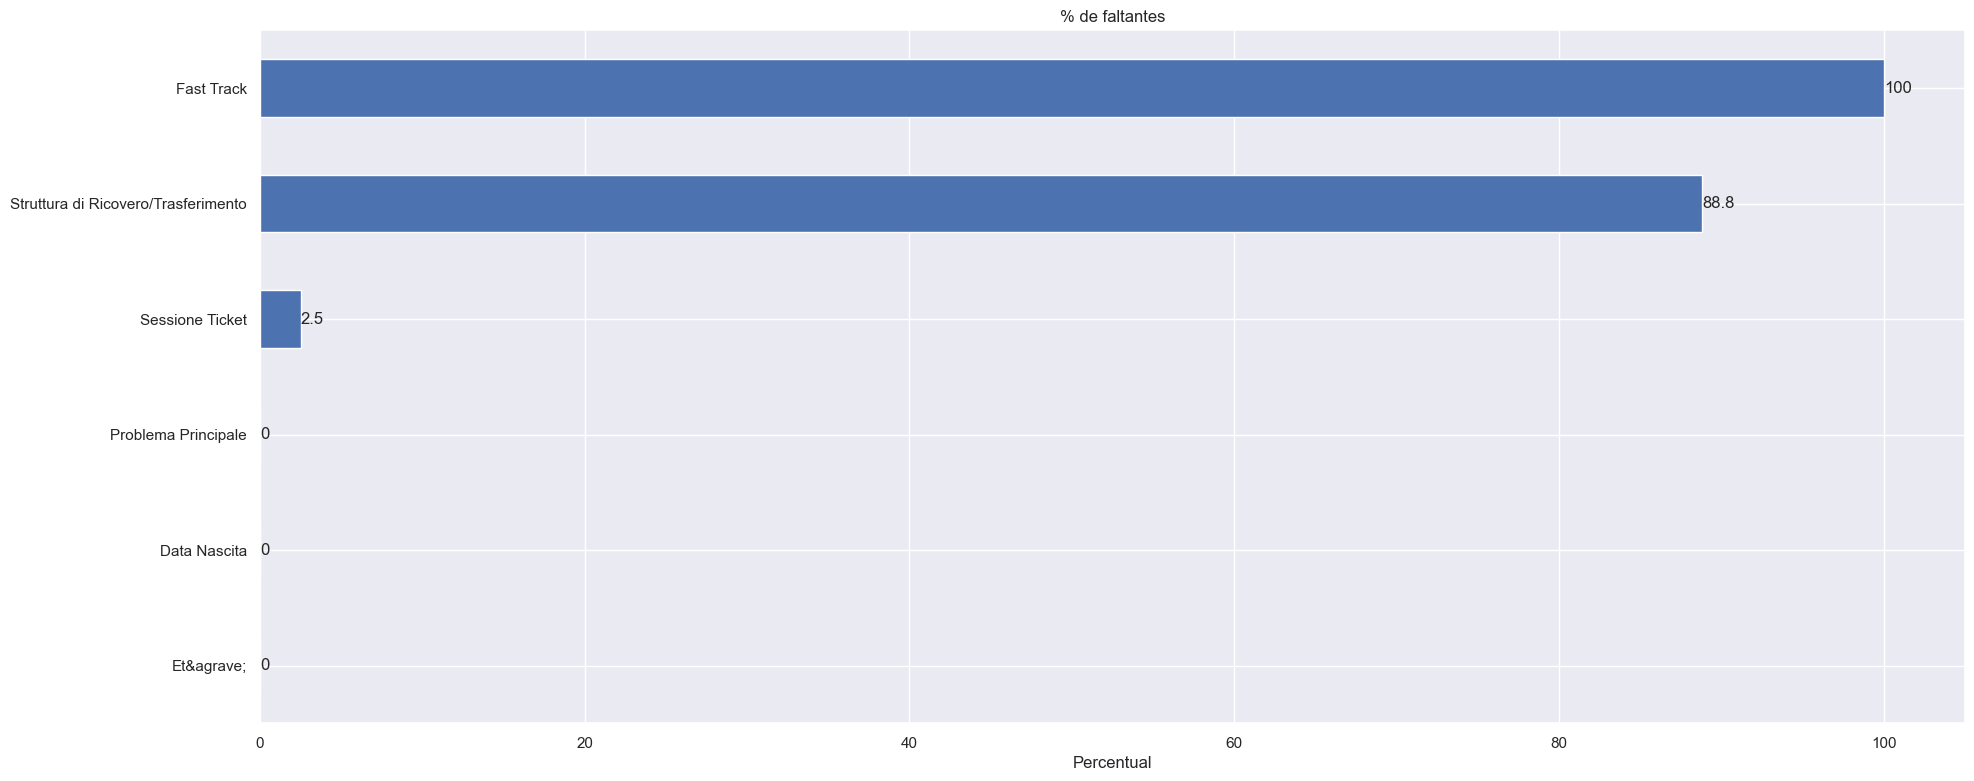

In [131]:
plota_ausentes(df, '% de faltantes', 'Percentual')

In [132]:
df.drop(
    columns=[
        "Fast Track",
        "Struttura",
        "Struttura di Ricovero/Trasferimento",
        "Sessione Ticket",
    ],
    inplace=True,
)

df.dropna(inplace=True)

In [133]:
plota_ausentes(df, '% de faltantes', 'Percentual')

Contagem de faltantes
Urgenza                0
Data Accesso           0
Data Fine Contatto     0
Paziente               0
Modalità Dimissione    0
Problema Principale    0
Numero Scheda PS       0
Medico Dimettente      0
Et&agrave;             0
Operatore Triagista    0
Data Nascita           0
dtype: int64


## 1.7. Estatística Descritiva


In [134]:
# Separando os atributos entre numéricos e categóricos
numericos = df.select_dtypes(exclude=['object'])

categoricos = df.select_dtypes(include=['object'])

### 1.7.1 Atributos Numéricos

In [135]:
numericos.describe().T

,count,mean,min,25%,50%,75%,max,std
Urgenza,160004.00,3.26,1.00,3.00,3.00,4.00,7.00,0.84
Data Accesso,160004,2023-07-16 01:20:43.678907392,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2024-12-31 00:00:00,NaN
Data Fine Contatto,160004,2023-07-16 03:48:32.417189376,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2025-01-01 00:00:00,NaN
Et&agrave;,160004.00,46.99,0.00,26.00,47.00,68.00,125.00,26.04
Data Nascita,160004,1978-05-30 11:41:42.747431328,1900-01-01 00:00:00,1956-11-28 00:00:00,1978-05-31 00:00:00,1999-08-14 00:00:00,2024-12-22 00:00:00,NaN


### 1.7.2 Atributos Categóricos

In [136]:
categoricos.apply(lambda x: x.unique().shape[0]).sort_values(ascending=False)

Numero Scheda PS       159808
Paziente                82135
Medico Dimettente          90
Operatore Triagista        88
Problema Principale        32
Modalità Dimissione        10
dtype: int64

In [137]:
df.sample(5)

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita
25434,3,2022-10-16,2022-10-16,FAUSTINI LORENZO,Dimissione a domicilio,Trauma,2022039008,LAMERA ALICE,21.00,TRAVAGLINI VALERIA,2004-03-13
45556,4,2022-04-12,2022-04-12,BERTOLI GIOVANNA,Dimissione a domicilio,Altri sintomi o disturbi,2022012675,RODA ANDREA,96.00,CARNEVALE ILARIA,1929-01-04
69966,2,2023-08-25,2023-08-25,LICHTENBERGER ROCHELLE,Dimissione a domicilio,Trauma,2023035700,RODA ANDREA,4.00,Margiotta Luca,2021-06-02
104304,3,2023-04-27,2023-04-27,ELASSAOUI EL BOUAZZAOUI,Il paziente abbandona il PS prima della visita...,Altri sintomi o disturbi,2023017419,DE LUCA DRUDA OTAVIO,48.00,BOGLIONI SIMONE,1977-08-30
53194,3,2023-05-04,2023-05-04,AGLIONI CAROLINA,Dimissione a domicilio,Altri sintomi o disturbi,2023018526,NAPOLI GIUSEPPINA,82.00,COLOSSI MIRKO,1943-05-17


## 1.8 Filtros

### 1.8.1. Filtros de alteração

### 1.8.2. Filtros de exclusão

In [138]:
# Criar uma coluna chamada 'Subgrupo Usuário' com os seguintes subgrupos: 
# < 4 atendimentos (Common user), 
# 4–5 atendimentos (Frequent User), 
# 6–9 atendimentos (High user), 
# ≥10 atendimentos (Heavy users)

# Primeiro, contar quantos atendimentos cada Paziente teve
contagem_por_paciente = df.groupby('Paziente').size()

# Criar um dicionário mapeando cada Paziente para sua categoria
def categoriza_paciente(quantidade):
    if quantidade < 4:
        return 'Common user'
    elif quantidade <= 5:
        return 'Frequent User'
    elif quantidade <= 9:
        return 'High User'
    else:
        return 'Heavy User'

# Mapear cada paciente para sua categoria
mapa_categorias = contagem_por_paciente.apply(categoriza_paciente)

# Adicionar a coluna no dataframe original
df['Subgrupo Usuário'] = df['Paziente'].map(mapa_categorias)
ano_2022['Subgrupo Usuário'] = ano_2022['Paziente'].map(mapa_categorias)
ano_2023['Subgrupo Usuário'] = ano_2023['Paziente'].map(mapa_categorias)
ano_2024['Subgrupo Usuário'] = ano_2024['Paziente'].map(mapa_categorias)

# Calcular a idade com base na data atual
data_referencia = datetime.now()
df['Idade'] = df['Data Nascita'].apply(lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None)
ano_2022['idade'] = ano_2022['Data Nascita'].apply(lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None)
ano_2023['idade'] = ano_2023['Data Nascita'].apply(lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None)
ano_2024['idade'] = ano_2024['Data Nascita'].apply(lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None)


def aplica_filtros(dataframe):
    # Filtrar apenas os pacientes sem problemas ginecológicos
    dataframe = dataframe[dataframe['Problema Principale'] != 'Sintomi o disturbi ostetrico-ginecologici']
    # Filtrar pacientes maiores que 14 anos
    dataframe = dataframe[dataframe['Idade'] > 14]
    return dataframe

# Verificar a distribuição das categorias criadas
print("Distribuição de ATENDIMENTOS por categoria:")
print(df['Subgrupo Usuário'].value_counts().sort_index())
print("\n" + "="*80)


print("Distribuição de PACIENTES ÚNICOS por categoria:")
pacientes_unicos_por_categoria = df.groupby('Subgrupo Usuário')['Numero Scheda PS'].nunique().sort_index()
print(pacientes_unicos_por_categoria)
print("\n" + "="*80)
print(f"Total de pacientes únicos: {df['Numero Scheda PS'].nunique()}")
print(f"Total de atendimentos: {len(df)}")

Distribuição de ATENDIMENTOS por categoria:
Subgrupo Usuário
Common user      106512
Frequent User     26107
Heavy User         9332
High User         18053
Name: count, dtype: int64

Distribuição de PACIENTES ÚNICOS por categoria:
Subgrupo Usuário
Common user      106418
Frequent User     26061
Heavy User         9323
High User         18006
Name: Numero Scheda PS, dtype: int64

Total de pacientes únicos: 159808
Total de atendimentos: 160004


In [139]:
# Conferindo a volumetria
print("Números totais da base")
print(f"Atendimentos:           {df.shape[0]}")
print(f"Pazientes:              {df['Paziente'].nunique()}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Cartões PS repetidos:   {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Números totais da base
Atendimentos:           160004
Pazientes:              82135
Cartões PS únicos:      159808
Cartões PS repetidos:   196


Dados anteriores:

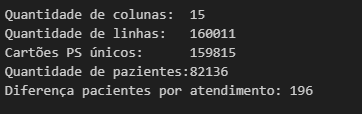

# 2 - Análise exploratória dos dados

## 2.1. Análise Univariada

### Verificando a variância das variáveis numéricas

In [140]:
df.shape

(160004, 13)

In [141]:
numericos.columns

Index(['Urgenza', 'Data Accesso', 'Data Fine Contatto', 'Et&agrave;',
       'Data Nascita'],
      dtype='object')

## 2.2. Análise Bivariada

In [142]:
df.head(2)

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita,Subgrupo Usuário,Idade
0,3,2022-01-01,2022-01-01,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,43.00,CRESCINI SONIA,1982-11-19,Common user,43
1,2,2022-01-01,2022-01-01,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,47.00,MACALUSO LIBORIO FABIO,1978-05-11,Common user,47


### Lista dos pacientes com mais atendimentos por período

,Quantidade de Visitas
Paziente,
PERI GINA,68
GUERRINI FRANCA,68
ALI MAGID,64
KAUR AMANDEEP,48
PRANDINI LAURA SIMONETTA,47
BARESI NATALE,40
KAUR HARPREET,40
NICOLAE STRUGURICA,38
EL YAQOUTI MAJDA,37


<Figure size 1400x800 with 0 Axes>

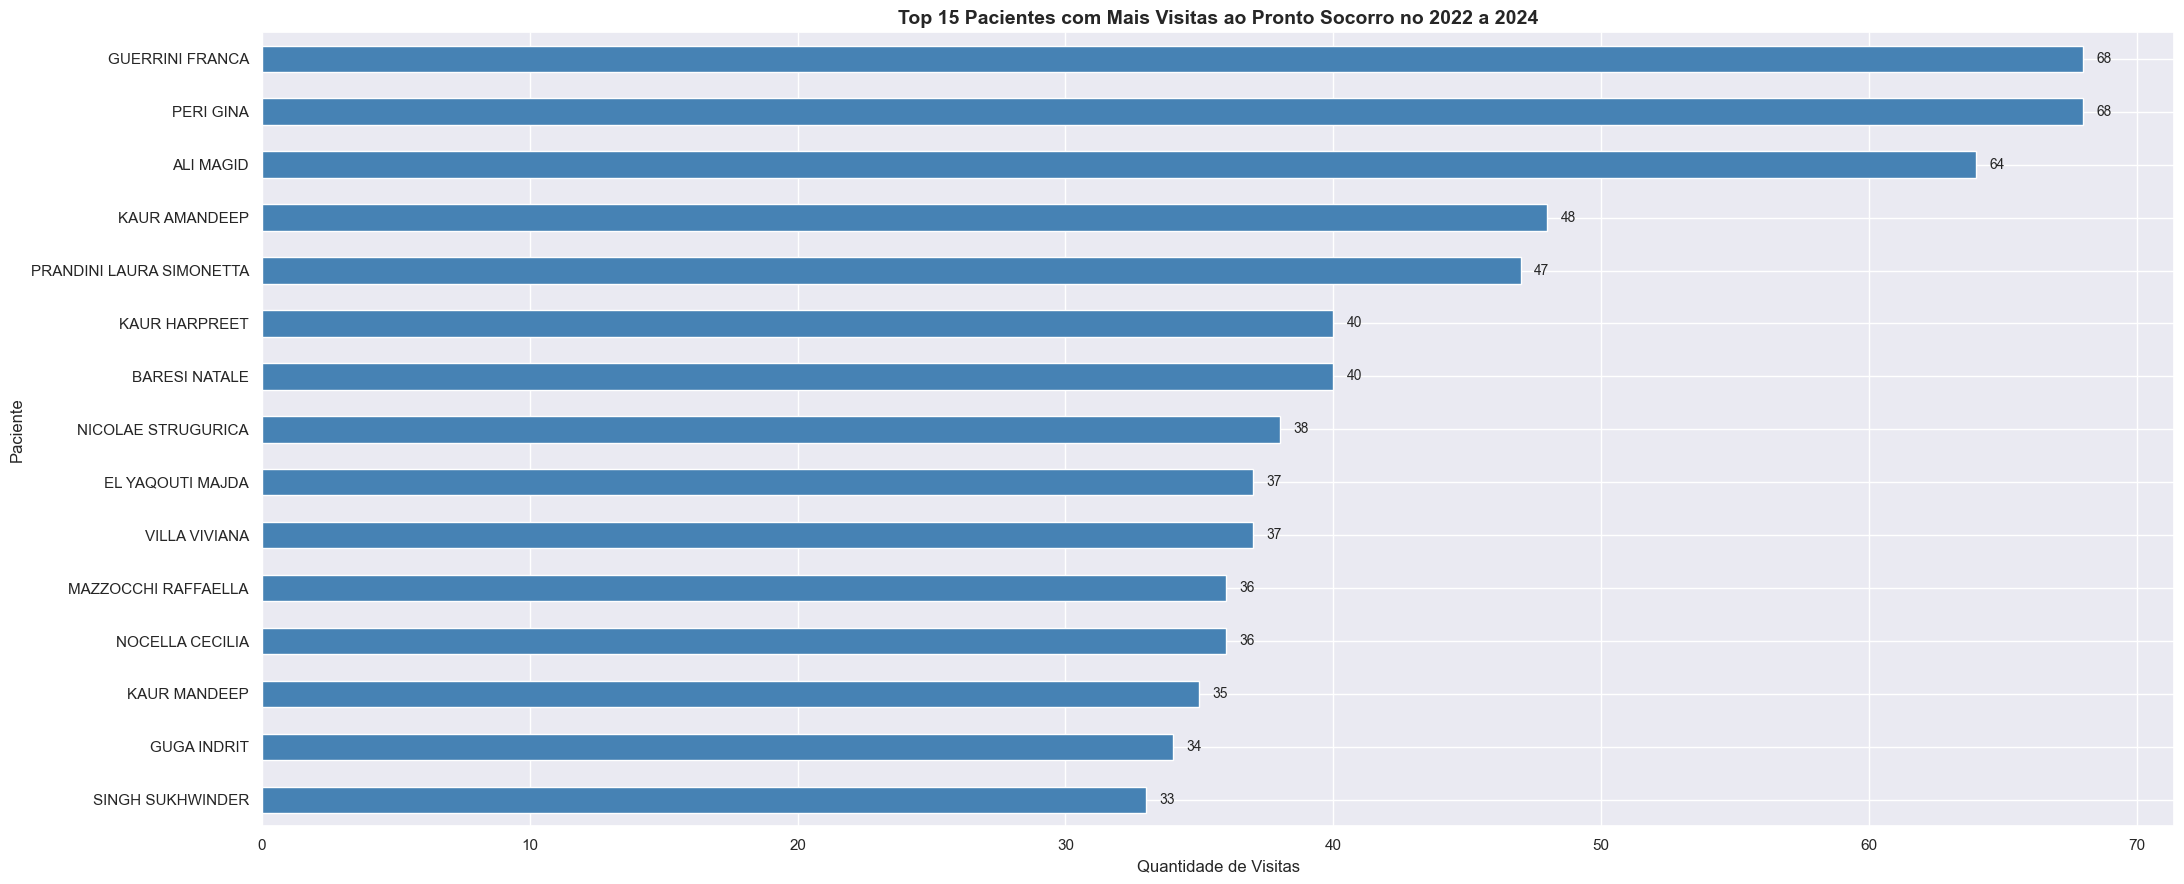

In [173]:
def agrupa(dataframe, top_n=10):
    # Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
    agrupado = dataframe[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(top_n)
    agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    display(agrupado)
    return agrupado

def gera_graficos_agrupados(dataframe, titulo_periodo, top_n=10):
    # Gráfico de barras - Top 10 pacientes com mais visitas ao PS
    plt.figure(figsize=(14, 8))
    ax = dataframe.sort_values(by='Quantidade de Visitas', ascending=True).plot(kind='barh', legend=False, color='steelblue')
    ax.set_xlabel('Quantidade de Visitas', fontsize=12)
    ax.set_ylabel('Paciente', fontsize=12)

    ax.set_title(f'Top {top_n} Pacientes com Mais Visitas ao Pronto Socorro no ' + titulo_periodo, fontsize=14, fontweight='bold')

    # Adicionar valores nas barras
    for i, v in enumerate(dataframe.sort_values(by='Quantidade de Visitas', ascending=True)['Quantidade de Visitas']):
        ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

    plt.tight_layout()
    plt.show();

def plota_mais_frequentes(dataframe, titulo, top_n=10):
    agrupado = agrupa(dataframe, top_n)  
    gera_graficos_agrupados(agrupado, titulo, top_n)

plota_mais_frequentes(df, '2022 a 2024', top_n=15)

In [144]:
# def agrupa2(dataframe):
#     # Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
#     agrupado = dataframe[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False)
#     agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    
#     return agrupado

# todos = agrupa2(df)
# display(todos.shape)

In [145]:
# Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
agrupado = df[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(20)
agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)

periodo = "período de 2022 a 2024"
agrupado

,Quantidade de Visitas
Paziente,
PERI GINA,68
GUERRINI FRANCA,68
ALI MAGID,64
KAUR AMANDEEP,48
PRANDINI LAURA SIMONETTA,47
BARESI NATALE,40
KAUR HARPREET,40
NICOLAE STRUGURICA,38
EL YAQOUTI MAJDA,37


<Figure size 1400x800 with 0 Axes>

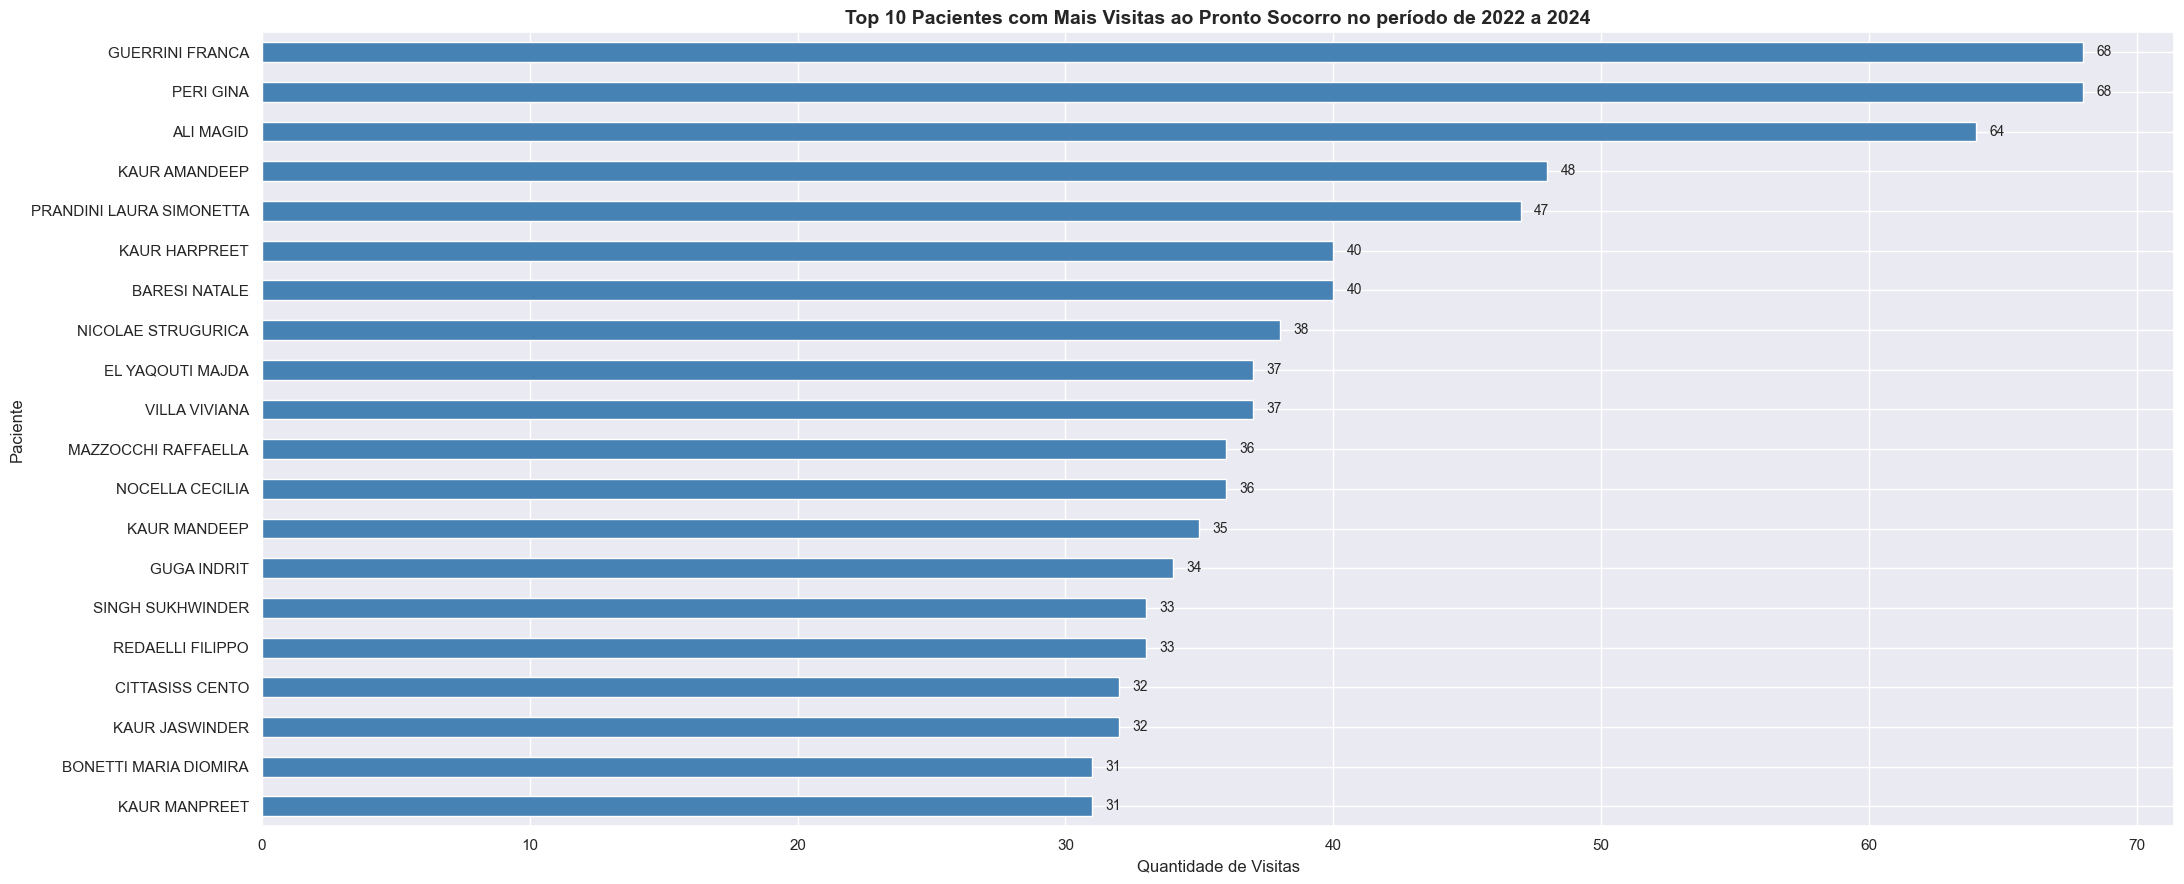

In [146]:
# Gráfico de barras - Top 10 pacientes com mais visitas ao PS
plt.figure(figsize=(14, 8))
ax = agrupado.sort_values(by='Quantidade de Visitas', ascending=True).plot(kind='barh', legend=False, color='steelblue')
ax.set_xlabel('Quantidade de Visitas', fontsize=12)
ax.set_ylabel('Paciente', fontsize=12)

ax.set_title('Top 10 Pacientes com Mais Visitas ao Pronto Socorro no ' + periodo, fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(agrupado.sort_values(by='Quantidade de Visitas', ascending=True)['Quantidade de Visitas']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show();

### Lista dos pacientes com mais atendimentos (nome e idade)

In [147]:
# Calcular a idade dos pacientes a partir da data de nascimento
from datetime import datetime

# Converter a coluna de data de nascimento para datetime
df['Data Nascita'] = pd.to_datetime(df['Data Nascita'], errors='coerce')

# Calcular a idade com base na data atual
data_referencia = datetime.now()
df['Idade'] = df['Data Nascita'].apply(
    lambda x: int((data_referencia - x).days / 365.25) if pd.notna(x) else None
)

# Agrupar por paciente e contar visitas, mantendo a idade
pacientes_info = (
    df[['Paziente', 'Numero Scheda PS', 'Idade']]
    .groupby(['Paziente', 'Idade'])
    .count()
    .reset_index()
    .sort_values(by='Numero Scheda PS', ascending=False)
    .head(20)
)

# Renomear colunas para melhor visualização
pacientes_info.rename(
    columns={
        'Paziente': 'Nome do Paciente',
        'Numero Scheda PS': 'Quantidade de Visitas',
        'Idade': 'Idade (anos)'
    }, 
    inplace=True
)

# Resetar o índice para exibição mais limpa
pacientes_info.reset_index(drop=True, inplace=True)
pacientes_info.index = pacientes_info.index + 1  # Começar índice em 1

print(f"Top 10 Pacientes com Mais Atendimentos no PS - {periodo}")
print("=" * 80)
pacientes_info

Top 10 Pacientes com Mais Atendimentos no PS - período de 2022 a 2024


,Nome do Paciente,Idade (anos),Quantidade de Visitas
1,PERI GINA,91,68
2,GUERRINI FRANCA,78,68
3,ALI MAGID,58,64
4,PRANDINI LAURA SIMONETTA,55,47
5,BARESI NATALE,94,39
6,NICOLAE STRUGURICA,46,38
7,VILLA VIVIANA,46,37
8,EL YAQOUTI MAJDA,22,37
9,NOCELLA CECILIA,61,36
10,MAZZOCCHI RAFFAELLA,51,36


### Análise de atendimentos por dia da semana

In [148]:
# Converter a coluna de data de entrada para datetime
df["Data Accesso"] = pd.to_datetime(df["Data Accesso"], errors="coerce")

# Criar coluna com o dia da semana
df["Dia_Semana"] = df["Data Accesso"].dt.day_name()

# Mapear os nomes em inglês para italiano
mapeamento_dias = {
    "Monday": "Lunedi",
    "Tuesday": "Martedi",
    "Wednesday": "Mercoledi",
    "Thursday": "Giovedi",
    "Friday": "Venerdi",
    "Saturday": "Sabato",
    "Sunday": "Domenica",
}
df["settimana"] = df["Dia_Semana"].map(mapeamento_dias)

# Contar atendimentos por dia da semana
atendimentos_por_dia = df["settimana"].value_counts()

# Ordenar pelos dias da semana
ordem_dias = [
    "Lunedi",
    "Martedi",
    "Mercoledi",
    "Giovedi",
    "Venerdi",
    "Sabato",
    "Domenica",
]
atendimentos_por_dia = atendimentos_por_dia.reindex(ordem_dias)

print(f"Distribuição de Atendimentos por Dia da Semana - {periodo}")
print("=" * 80)
atendimentos_por_dia

Distribuição de Atendimentos por Dia da Semana - período de 2022 a 2024


settimana
Lunedi       25525
Martedi      23179
Mercoledi    22519
Giovedi      22428
Venerdi      22964
Sabato       21829
Domenica     21560
Name: count, dtype: int64

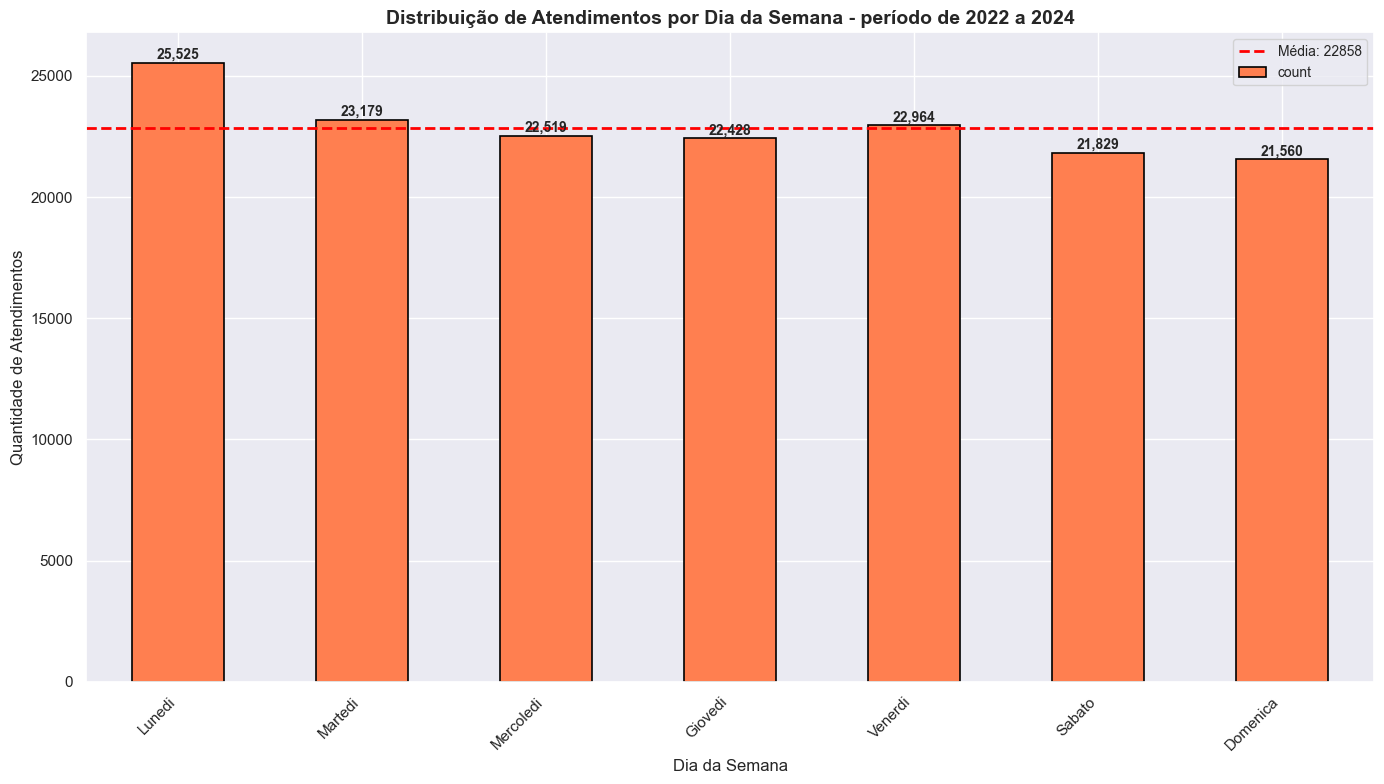

In [149]:
# Gráfico de barras - Atendimentos por dia da semana
plt.figure(figsize=(14, 8))
ax = atendimentos_por_dia.plot(kind='bar', color='coral', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Dia da Semana', fontsize=12)
ax.set_ylabel('Quantidade de Atendimentos', fontsize=12)
ax.set_title(f'Distribuição de Atendimentos por Dia da Semana - {periodo}', 
             fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(atendimentos_por_dia):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_atendimentos = atendimentos_por_dia.mean()
ax.axhline(y=media_atendimentos, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_atendimentos:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Análise dos 10 principais problemas de saúde

In [150]:
# Contar os principais problemas de saúde
principais_problemas = df['Problema Principale'].value_counts().head(10)

print(f"Top 10 Principais Problemas de Saúde - {periodo}")
print("=" * 80)
principais_problemas

Top 10 Principais Problemas de Saúde - período de 2022 a 2024


Problema Principale
Altri sintomi o disturbi                     44756
Trauma                                       34124
Dolore addominale                            13540
Febbre                                       10990
Sintomi o disturbi ostetrico-ginecologici     8309
Dolore toracico                               7596
Sintomi o disturbi urologici                  6476
Dispnea                                       6174
Sintomi o disturbi oculistici                 5154
Altri sintomi sistema nervoso                 5125
Name: count, dtype: int64

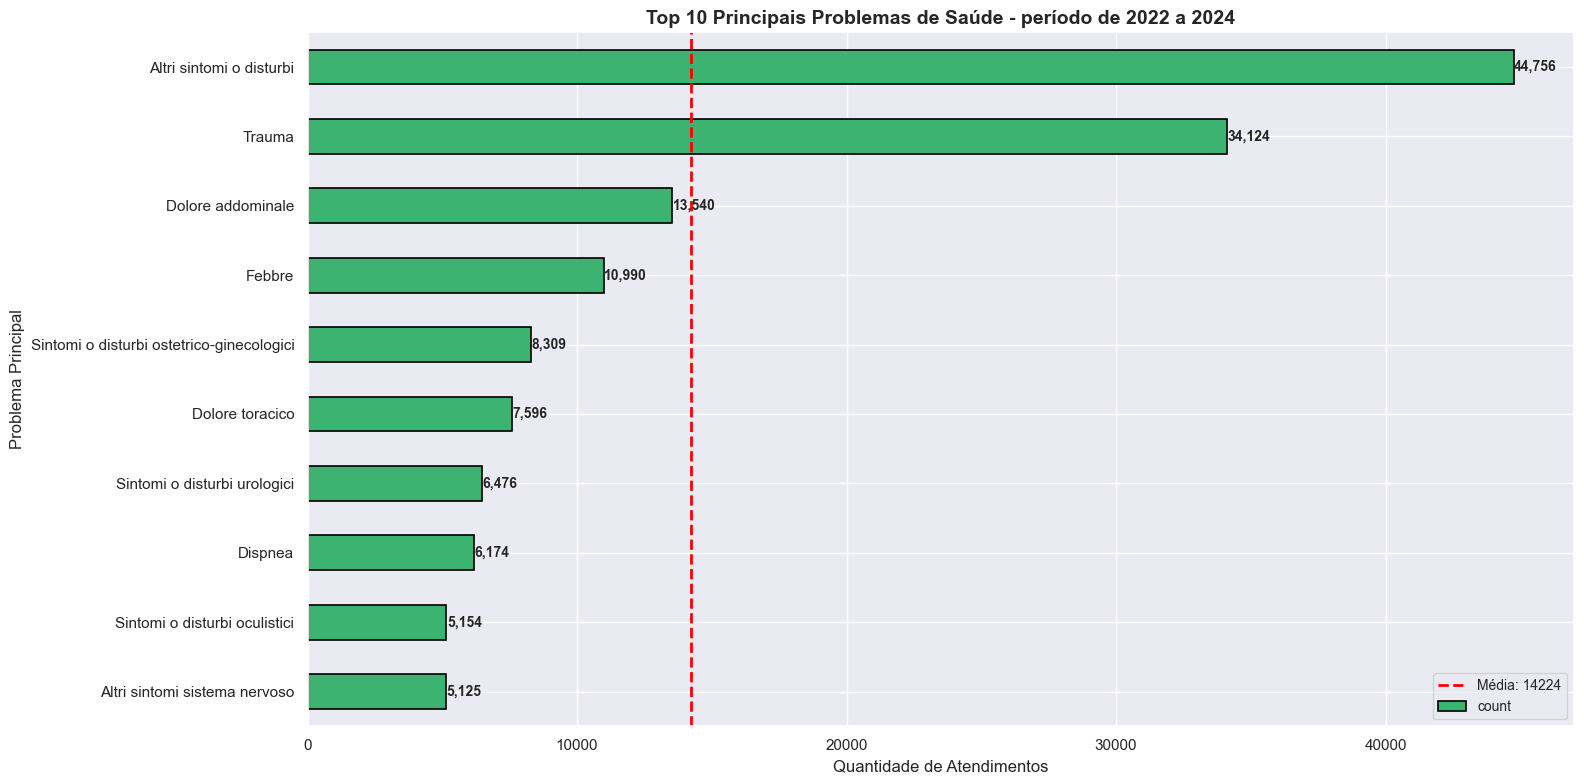

In [151]:
# Gráfico de barras - Top 10 principais problemas
plt.figure(figsize=(16, 8))
ax = principais_problemas.sort_values(ascending=True).plot(
    kind='barh', 
    color='mediumseagreen', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Quantidade de Atendimentos', fontsize=12)
ax.set_ylabel('Problema Principal', fontsize=12)
ax.set_title(f'Top 10 Principais Problemas de Saúde - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(principais_problemas.sort_values(ascending=True)):
    ax.text(v + 20, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_problemas = principais_problemas.mean()
ax.axvline(x=media_problemas, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_problemas:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

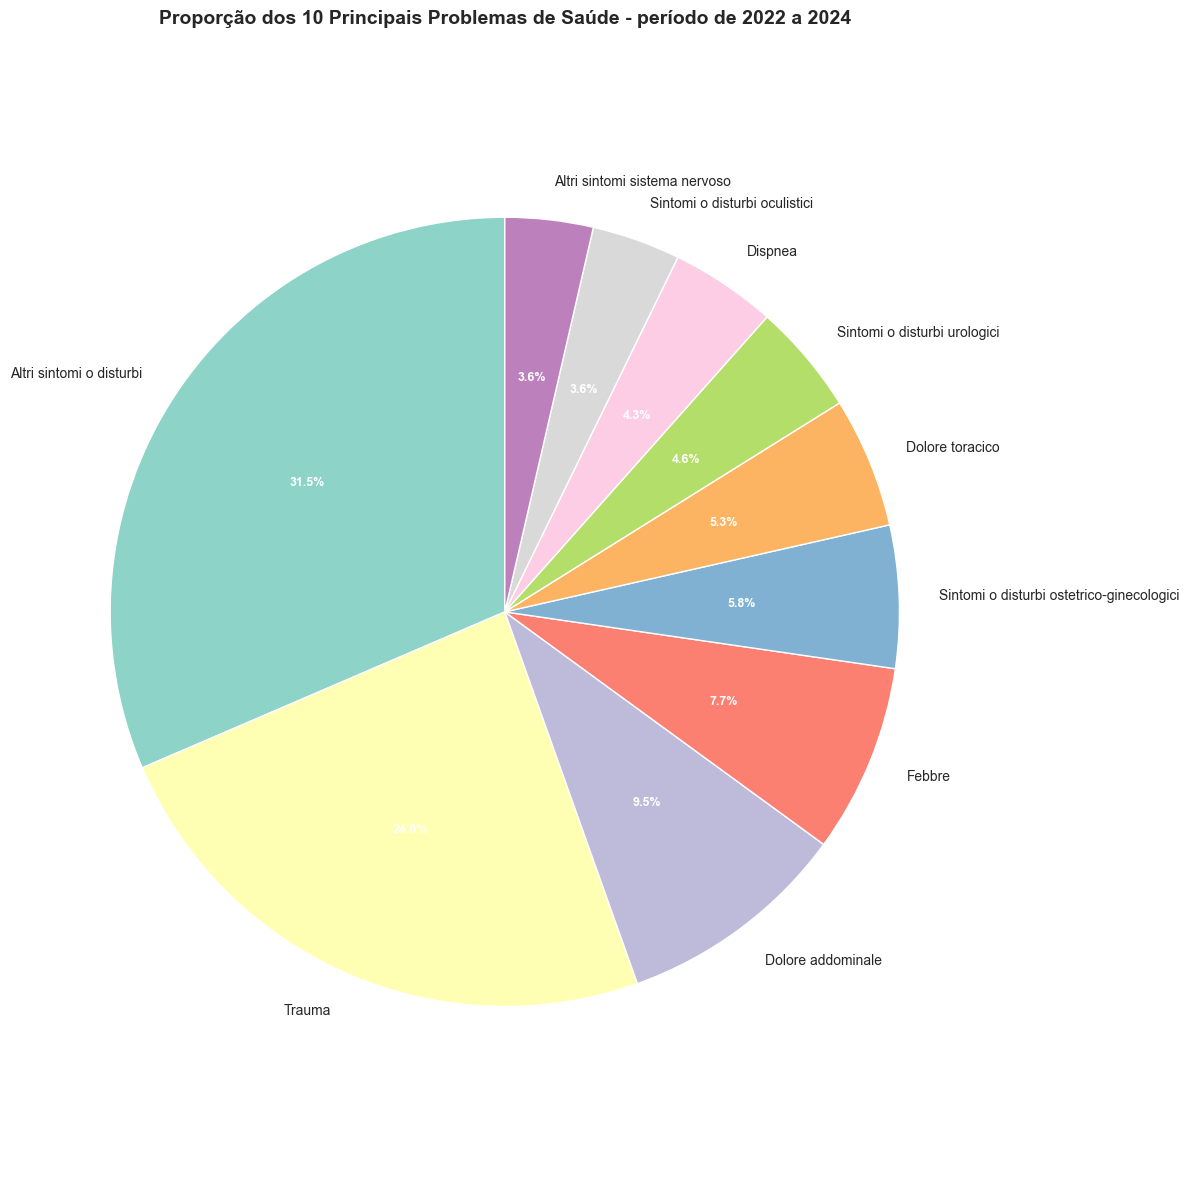

In [152]:
# Gráfico de pizza - Proporção dos 10 principais problemas
plt.figure(figsize=(12, 12))

# Criar o gráfico de pizza
colors = plt.cm.Set3(range(len(principais_problemas)))
wedges, texts, autotexts = plt.pie(
    principais_problemas, 
    labels=principais_problemas.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Melhorar a legibilidade dos percentuais
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.title(f'Proporção dos 10 Principais Problemas de Saúde - {periodo}', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Análise de atendimentos por mês

In [153]:
# Criar coluna com o mês e ano
df['Mes_Ano'] = df['Data Accesso'].dt.to_period('M')

# Contar atendimentos por mês
atendimentos_por_mes = df['Mes_Ano'].value_counts().sort_index()

# Converter o período de volta para string para melhor visualização
atendimentos_por_mes.index = atendimentos_por_mes.index.astype(str)

# Meses em italiano
mes_ano = {
    '2022-01': 'Gennaio/2022',
    '2022-02': 'Febbraio/2022',
    '2022-03': 'Marzo/2022',
    '2022-04': 'Aprile/2022',
    '2022-05': 'Maggio/2022',
    '2022-06': 'Giugno/2022',
    '2022-07': 'Luglio/2022',
    '2022-08': 'Agosto/2022',
    '2022-09': 'Settembre/2022',
    '2022-10': 'Ottobre/2022',
    '2022-11': 'Novembre/2022',
    '2022-12': 'Dicembre/2022',
    '2023-01': 'Gennaio/2023',
    '2023-02': 'Febbraio/2023',
    '2023-03': 'Marzo/2023',
    '2023-04': 'Aprile/2023',
    '2023-05': 'Maggio/2023',
    '2023-06': 'Giugno/2023',
    '2023-07': 'Luglio/2023',
    '2023-08': 'Agosto/2023',
    '2023-09': 'Settembre/2023',
    '2023-10': 'Ottobre/2023',
    '2023-11': 'Novembre/2023',
    '2023-12': 'Dicembre/2023',
    '2024-01': 'Gennaio/2024',
    '2024-02': 'Febbraio/2024',
    '2024-03': 'Marzo/2024',
    '2024-04': 'Aprile/2024',
    '2024-05': 'Maggio/2024',
    '2024-06': 'Giugno/2024',
    '2024-07': 'Luglio/2024',
    '2024-08': 'Agosto/2024',
    '2024-09': 'Settembre/2024',
    '2024-10': 'Ottobre/2024',
    '2024-11': 'Novembre/2024',
    '2024-12': 'Dicembre/2024',    
    }

df['Mes_Ano_It'] = df['Mes_Ano'].astype(str).map(mes_ano)
df.head()

print(f"Distribuição de Atendimentos por Mês - {periodo}")
print("=" * 80)
atendimentos_por_mes

Distribuição de Atendimentos por Mês - período de 2022 a 2024


Mes_Ano
2022-01    3432
2022-02    3401
2022-03    4170
2022-04    4204
2022-05    4562
2022-06    4515
2022-07    4401
2022-08    3880
2022-09    4130
2022-10    4479
2022-11    4523
2022-12    4483
2023-01    4483
2023-02    4287
2023-03    4594
2023-04    4413
2023-05    4815
2023-06    4586
2023-07    4547
2023-08    4271
2023-09    4448
2023-10    4585
2023-11    4406
2023-12    4948
2024-01    4434
2024-02    4384
2024-03    4750
2024-04    4752
2024-05    4910
2024-06    4649
2024-07    4766
2024-08    4467
2024-09    4509
2024-10    4681
2024-11    4511
2024-12    4628
Name: count, dtype: int64

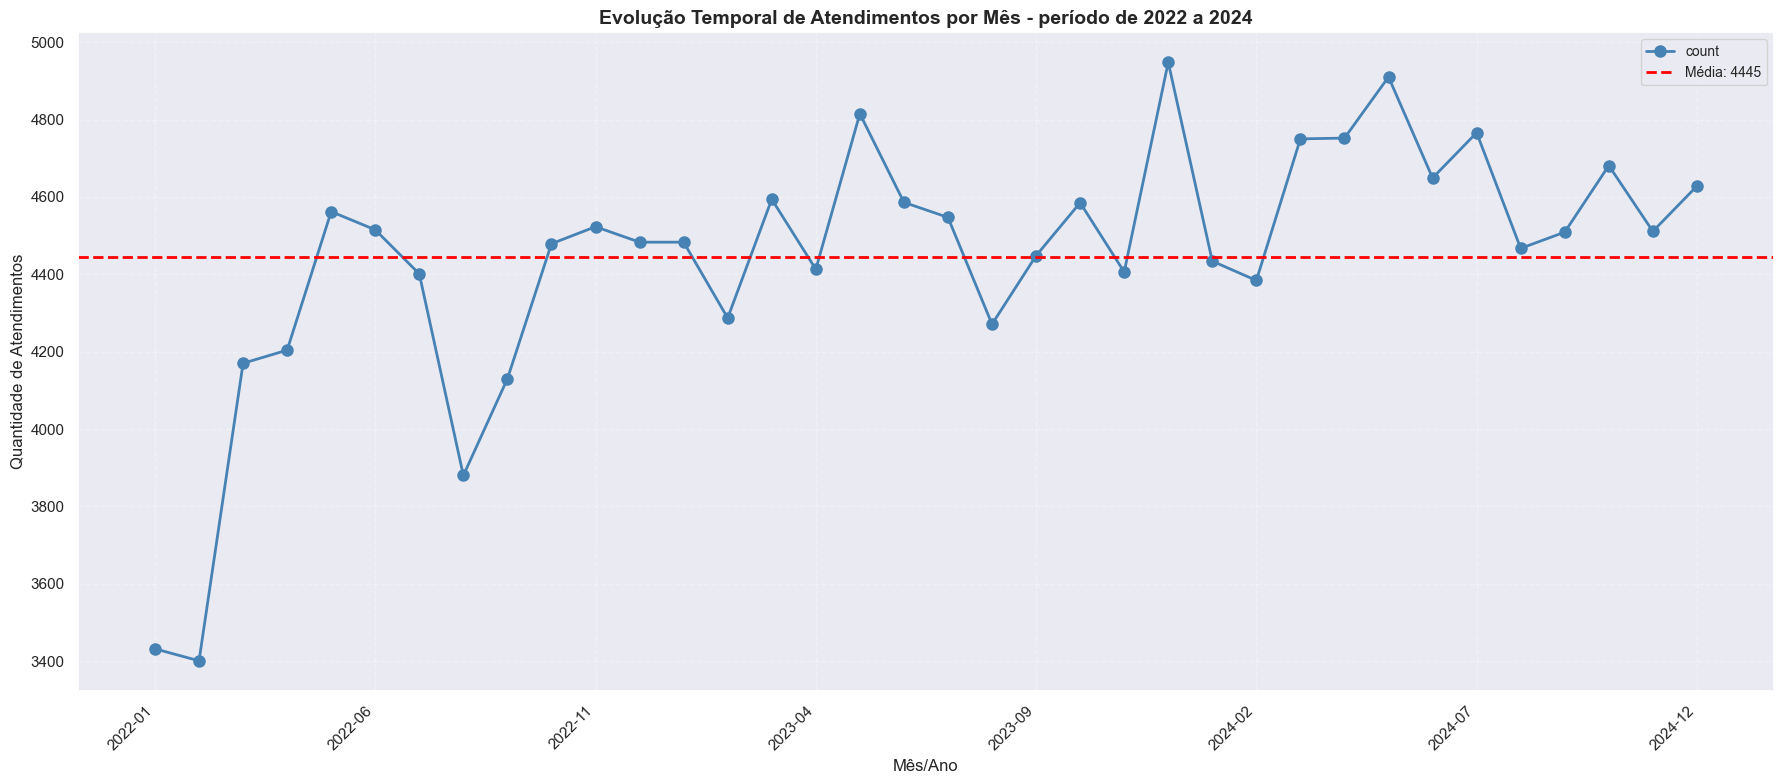

In [154]:
# Gráfico de linha - Atendimentos por mês
plt.figure(figsize=(18, 8))
ax = atendimentos_por_mes.plot(kind='line', marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Mês/Ano', fontsize=12)
ax.set_ylabel('Quantidade de Atendimentos', fontsize=12)
ax.set_title(f'Evolução Temporal de Atendimentos por Mês - {periodo}', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Rotacionar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar linha de média
media_mensal = atendimentos_por_mes.mean()
ax.axhline(y=media_mensal, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_mensal:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

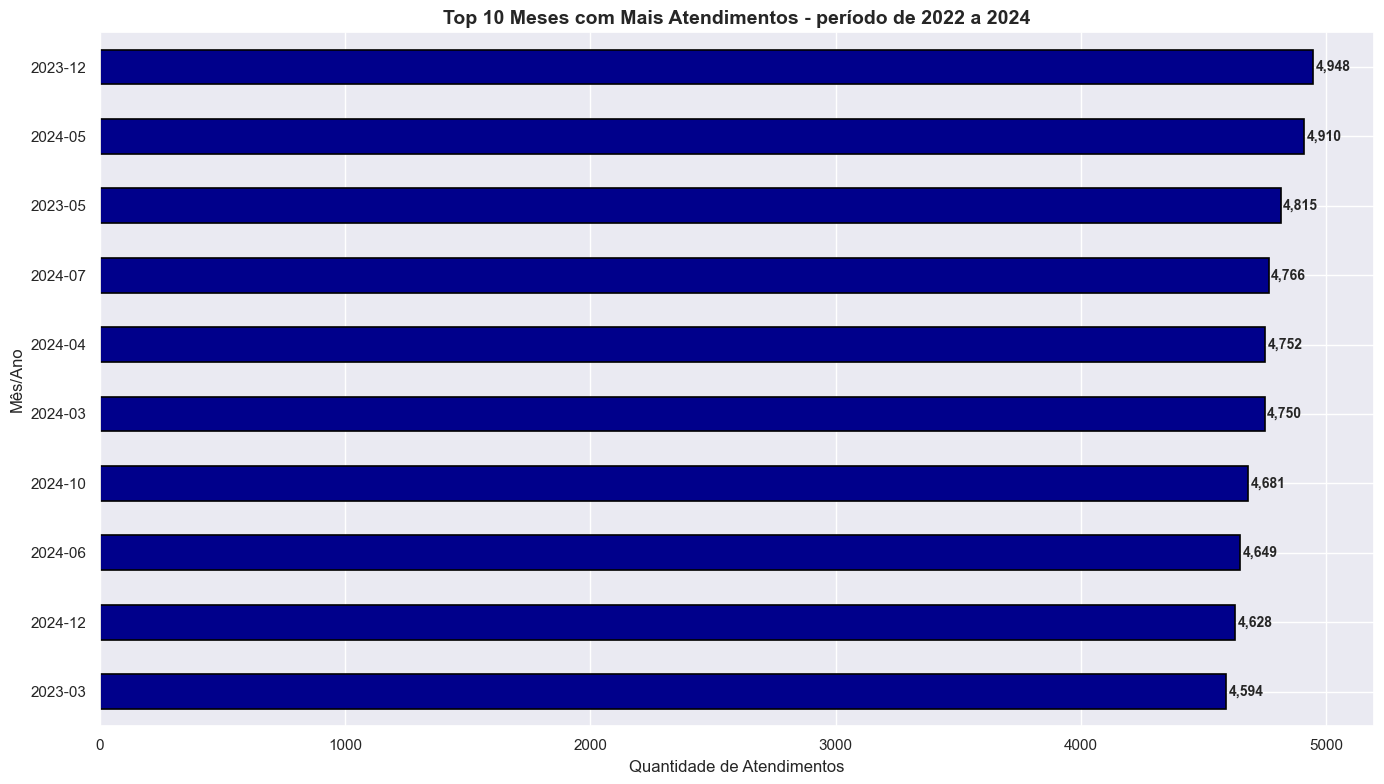

In [155]:
# Top 10 meses com mais atendimentos
top_10_meses = atendimentos_por_mes.nlargest(10)

# Gráfico de barras - Top 10 meses
plt.figure(figsize=(14, 8))
ax = top_10_meses.sort_values(ascending=True).plot(
    kind='barh', 
    color='darkblue', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Quantidade de Atendimentos', fontsize=12)
ax.set_ylabel('Mês/Ano', fontsize=12)
ax.set_title(f'Top 10 Meses com Mais Atendimentos - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(top_10_meses.sort_values(ascending=True)):
    ax.text(v + 10, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Análise de categorias de usuários (Subgrupo Usuário)

In [156]:
pacientes_unicos = df[['Paziente', 'Subgrupo Usuário']]
pacientes_unicos.drop_duplicates(inplace=True)
pacientes_unicos.shape

(82135, 2)

In [157]:
# Limpa o dataset para ficar apenas os pacientes únicos
pacientes_unicos = df[['Paziente', 'Subgrupo Usuário']]
pacientes_unicos.drop_duplicates(inplace=True)

# Contar pacientes por categoria de subgrupo
categorias_usuarios = pacientes_unicos['Subgrupo Usuário'].value_counts()

# Ordenar pelas categorias definidas
ordem_categorias = ['Common user', 'Frequent User', 'High User', 'Heavy User']
categorias_usuarios = categorias_usuarios.reindex(ordem_categorias)

# Calcular percentuais
percentuais = (categorias_usuarios / categorias_usuarios.sum() * 100).round(2)

print(f"Distribuição de Pacientes por Categoria de Uso - {periodo}")
print("=" * 90)
print("\n📊 CONTAGEM ABSOLUTA:")
print(categorias_usuarios)
print("\n📈 PERCENTUAL POR CATEGORIA:")
for cat, valor in percentuais.items():
    print(f"  {cat:20s}: {valor:>6.2f}%")
print("\n" + "=" * 90)
print(f"TOTAL DE PACIENTES: {categorias_usuarios.sum():,}")

Distribuição de Pacientes por Categoria de Uso - período de 2022 a 2024

📊 CONTAGEM ABSOLUTA:
Subgrupo Usuário
Common user      72855
Frequent User     6010
High User         2604
Heavy User         666
Name: count, dtype: int64

📈 PERCENTUAL POR CATEGORIA:
  Common user         :  88.70%
  Frequent User       :   7.32%
  High User           :   3.17%
  Heavy User          :   0.81%

TOTAL DE PACIENTES: 82,135


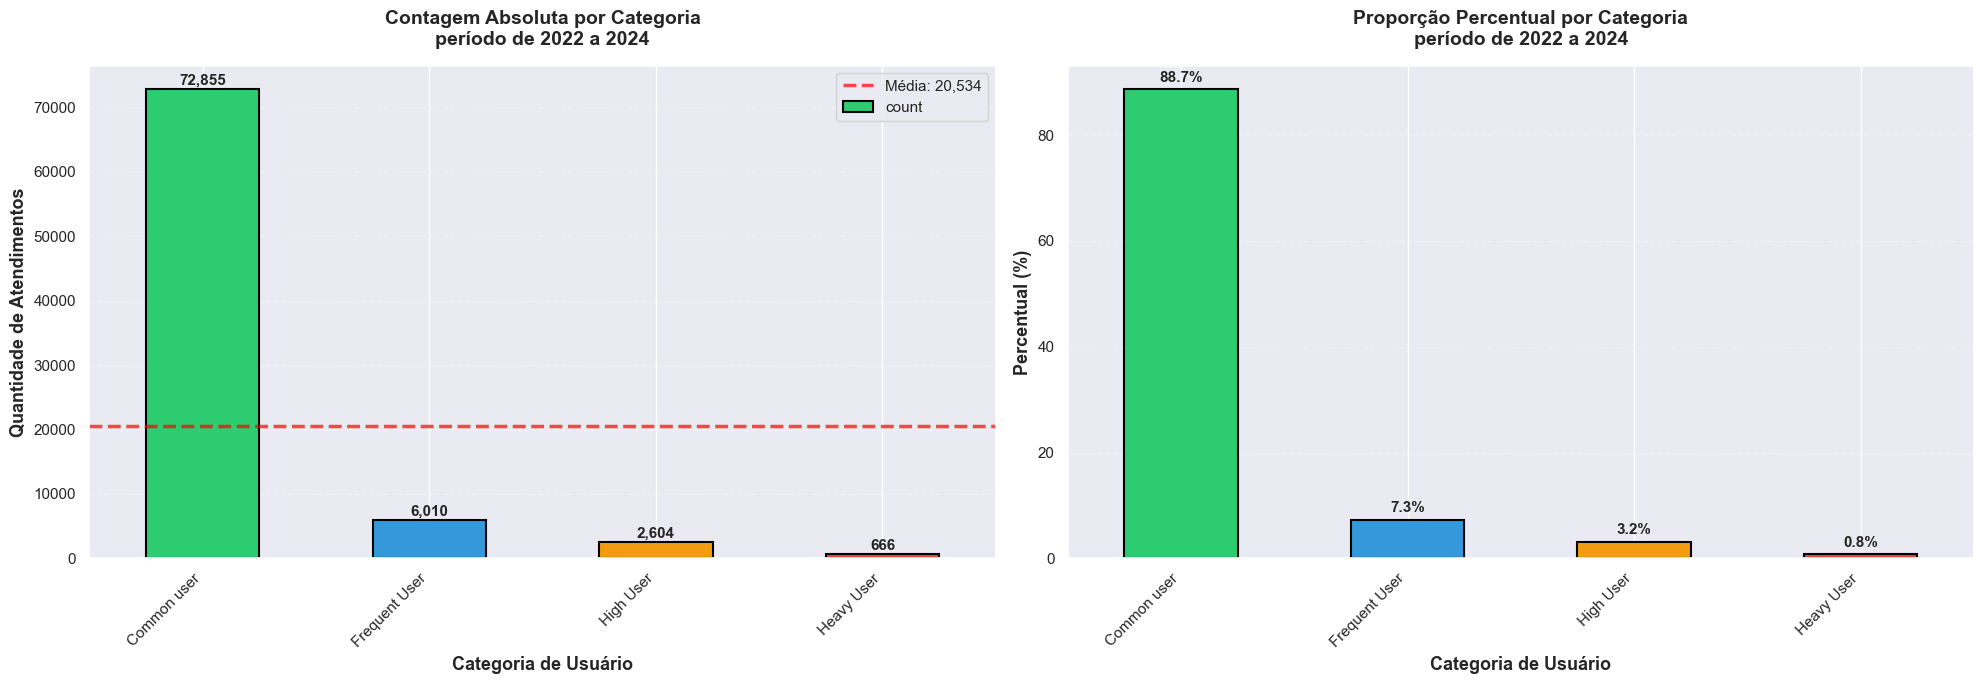

In [158]:
# Gráfico de barras comparativo - Contagem vs Percentual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Gráfico 1: Contagem absoluta
colors_gradient = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
categorias_usuarios.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax1)
ax1.set_xlabel('Categoria de Usuário', fontsize=13, fontweight='bold')
ax1.set_ylabel('Quantidade de Atendimentos', fontsize=13, fontweight='bold')
ax1.set_title(f'Contagem Absoluta por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(categorias_usuarios):
    ax1.text(i, v + 200, f'{v:,}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_cat = categorias_usuarios.mean()
ax1.axhline(y=media_cat, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média: {media_cat:,.0f}', alpha=0.7)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico 2: Percentual
percentuais.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax2)
ax2.set_xlabel('Categoria de Usuário', fontsize=13, fontweight='bold')
ax2.set_ylabel('Percentual (%)', fontsize=13, fontweight='bold')
ax2.set_title(f'Proporção Percentual por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(percentuais):
    ax2.text(i, v + 0.8, f'{v:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

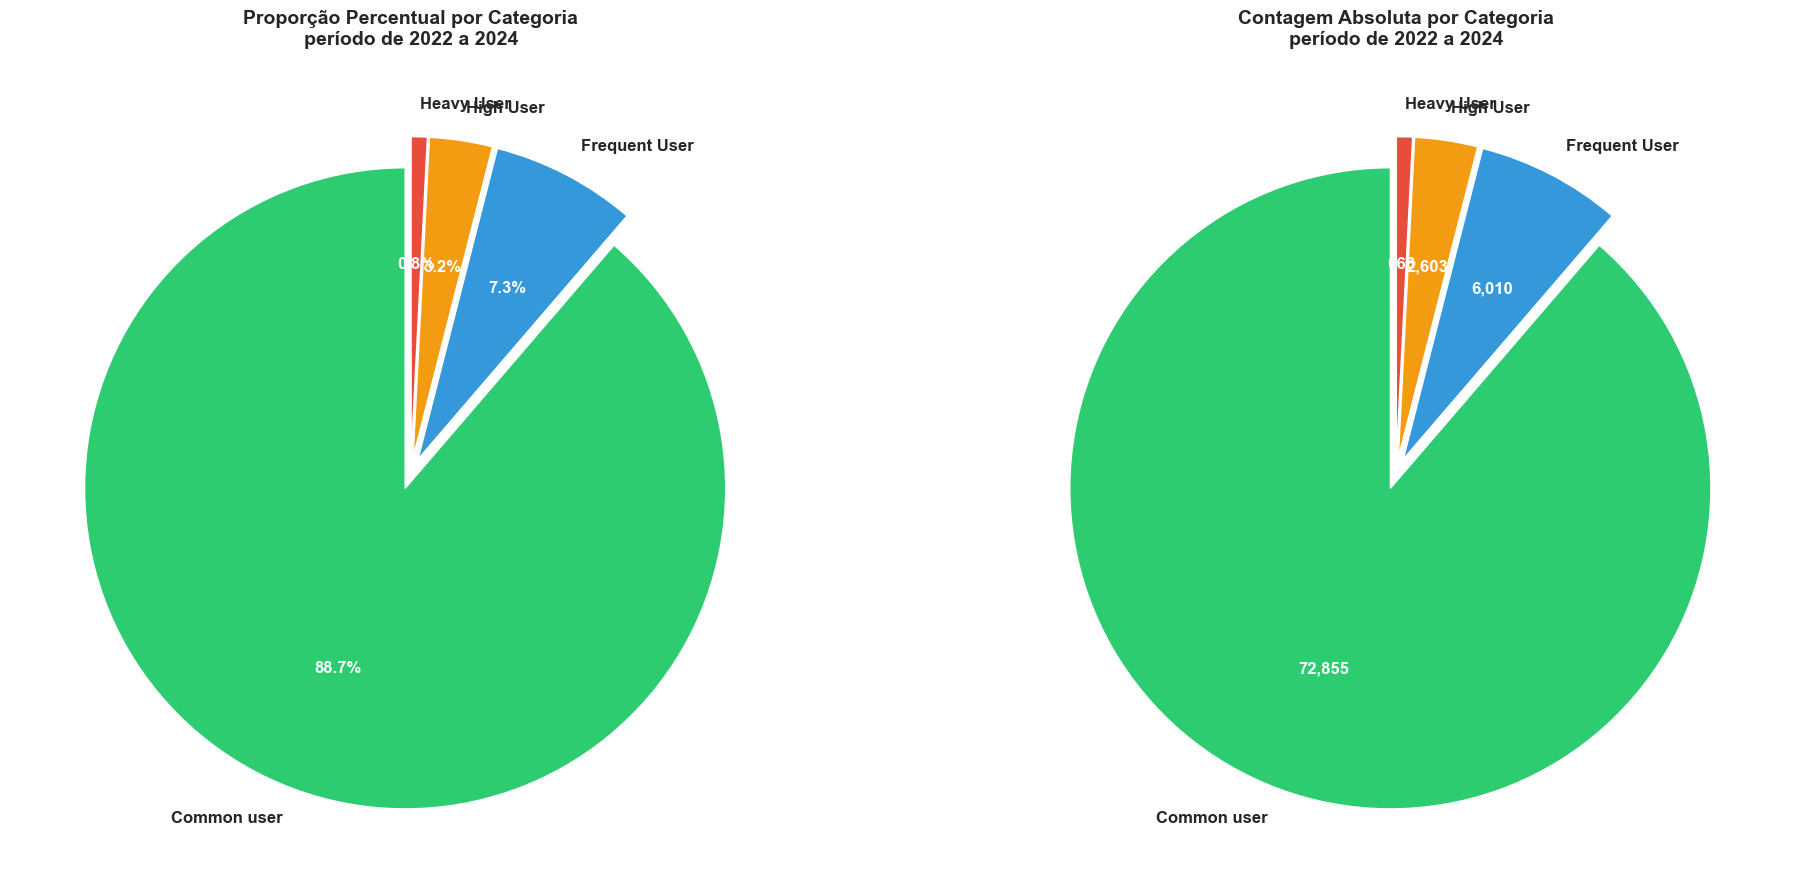

In [159]:
# Gráficos de pizza - Comparação visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Pizza 1: Percentuais
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges, texts, autotexts = ax1.pie(
    categorias_usuarios, 
    labels=categorias_usuarios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Proporção Percentual por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

# Pizza 2: Valores absolutos
wedges2, texts2, autotexts2 = ax2.pie(
    categorias_usuarios, 
    labels=categorias_usuarios.index,
    autopct=lambda pct: f'{int(pct/100 * categorias_usuarios.sum()):,}',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax2.set_title(f'Contagem Absoluta por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

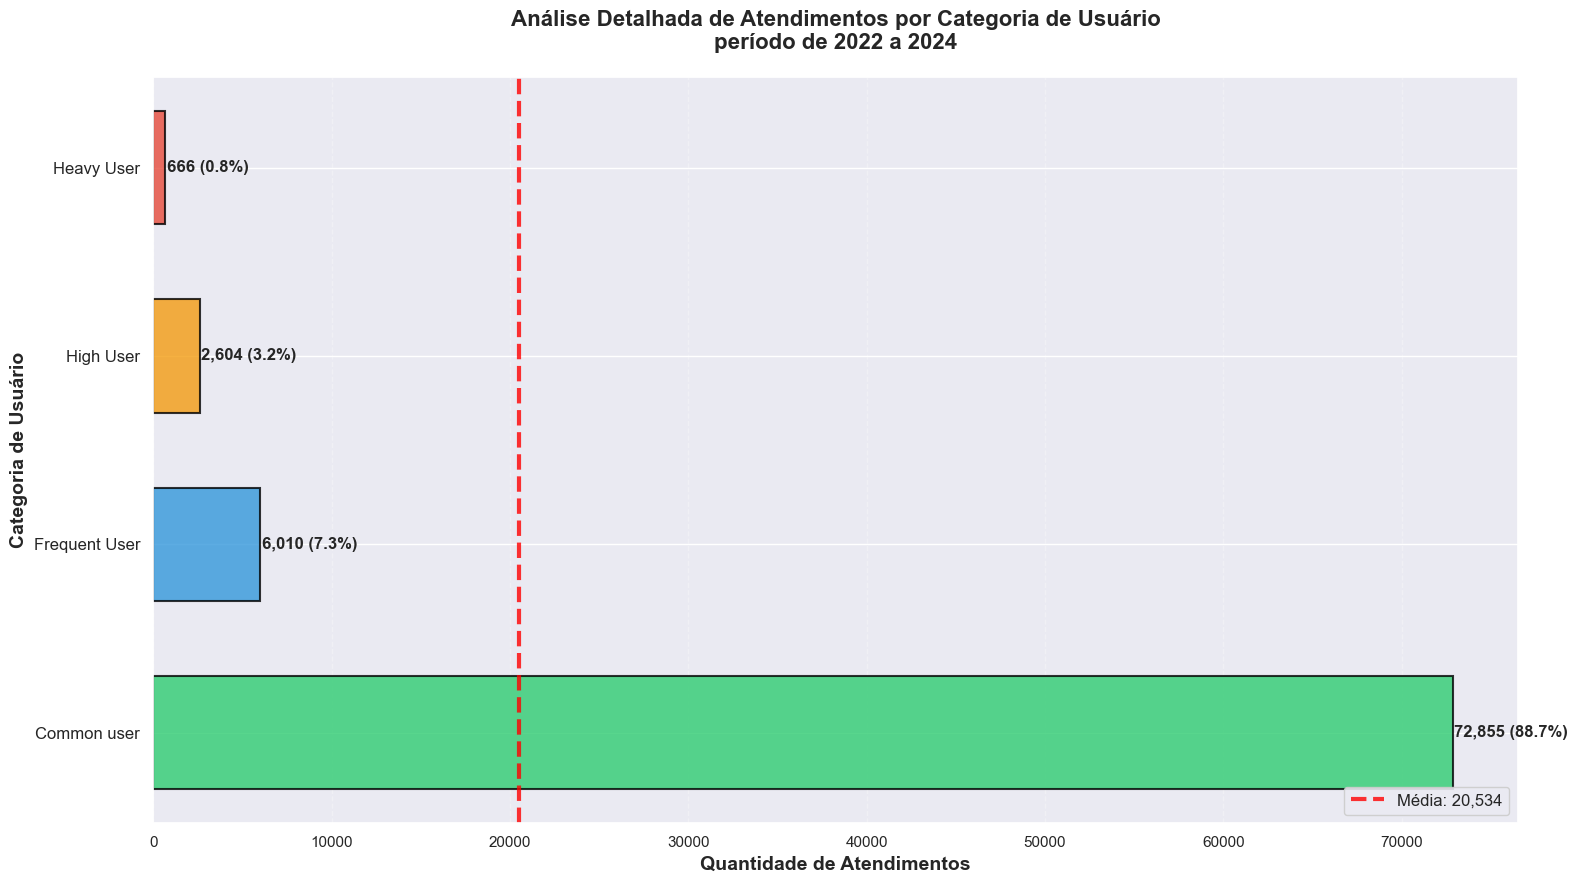

In [160]:
# Gráfico de barras horizontais com métricas completas
plt.figure(figsize=(16, 9))
y_pos = np.arange(len(categorias_usuarios))

# Criar barras horizontais
bars = plt.barh(y_pos, categorias_usuarios.values, 
                color=colors_gradient, edgecolor='black', linewidth=1.5, height=0.6)

# Customizar eixos
plt.xlabel('Quantidade de Atendimentos', fontsize=14, fontweight='bold')
plt.ylabel('Categoria de Usuário', fontsize=14, fontweight='bold')
plt.title(f'Análise Detalhada de Atendimentos por Categoria de Usuário\n{periodo}', 
          fontsize=16, fontweight='bold', pad=20)
plt.yticks(y_pos, categorias_usuarios.index, fontsize=12)

# Adicionar valores, percentuais e informações extras nas barras
for i, (v, p) in enumerate(zip(categorias_usuarios.values, percentuais.values)):
    # Valor absoluto e percentual
    plt.text(v + 100, i, f'{v:,} ({p:.1f}%)', 
             va='center', fontsize=12, fontweight='bold')
    
    # Barra colorida por categoria
    bars[i].set_alpha(0.8)

# Adicionar linha de média
plt.axvline(x=media_cat, color='red', linestyle='--', linewidth=3, 
            label=f'Média: {media_cat:,.0f}', alpha=0.8)

# Adicionar grade e legenda
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.show()

In [161]:
# Tabela resumo estatístico detalhada
resumo_categorias = pd.DataFrame({
    'Categoria': categorias_usuarios.index,
    'Contagem': categorias_usuarios.values,
    'Percentual (%)': percentuais.values,
    'Acumulado': categorias_usuarios.cumsum().values,
    'Perc. Acumulado (%)': percentuais.cumsum().round(2).values
})

print(f"\n{'='*100}")
print(f"{'RESUMO ESTATÍSTICO DETALHADO - CATEGORIAS DE USUÁRIOS':^100}")
print(f"{'Período: ' + periodo:^100}")
print(f"{'='*100}\n")
print(resumo_categorias.to_string(index=False))
print(f"\n{'='*100}")
print(f"📊 TOTAL DE ATENDIMENTOS: {categorias_usuarios.sum():,}")
print(f"📈 NÚMERO DE CATEGORIAS: {len(categorias_usuarios)}")
print(f"📉 MÉDIA POR CATEGORIA: {media_cat:,.2f}")
print(f"📌 DESVIO PADRÃO: {categorias_usuarios.std():,.2f}")
print(f"{'='*100}\n")

# Exibir insights
print("💡 INSIGHTS:")
categoria_maior = categorias_usuarios.idxmax()
categoria_menor = categorias_usuarios.idxmin()
print(f"   • Categoria com MAIS atendimentos: {categoria_maior} ({categorias_usuarios.max():,} - {percentuais.max():.1f}%)")
print(f"   • Categoria com MENOS atendimentos: {categoria_menor} ({categorias_usuarios.min():,} - {percentuais.min():.1f}%)")
print(f"   • Diferença entre maior e menor: {categorias_usuarios.max() - categorias_usuarios.min():,} atendimentos")
print(f"{'='*100}")


                       RESUMO ESTATÍSTICO DETALHADO - CATEGORIAS DE USUÁRIOS                        
                                  Período: período de 2022 a 2024                                   

    Categoria  Contagem  Percentual (%)  Acumulado  Perc. Acumulado (%)
  Common user     72855           88.70      72855                88.70
Frequent User      6010            7.32      78865                96.02
    High User      2604            3.17      81469                99.19
   Heavy User       666            0.81      82135               100.00

📊 TOTAL DE ATENDIMENTOS: 82,135
📈 NÚMERO DE CATEGORIAS: 4
📉 MÉDIA POR CATEGORIA: 20,533.75
📌 DESVIO PADRÃO: 34,950.71

💡 INSIGHTS:
   • Categoria com MAIS atendimentos: Common user (72,855 - 88.7%)
   • Categoria com MENOS atendimentos: Heavy User (666 - 0.8%)
   • Diferença entre maior e menor: 72,189 atendimentos


## 2.3. Top 15 Pacientes Mais Frequentes por Subgrupo de Usuário

In [171]:
# Função para obter top pacientes por subgrupo
def organiza(dataframe, subgrupo):
    """
    Retorna os top N pacientes mais frequentes de um subgrupo específico
    """
    # Filtrar por subgrupo
    df_subgrupo = dataframe[dataframe['Subgrupo Usuário'] == subgrupo]
    
    # Agrupar por paciente e contar visitas
    top_pacientes = (
        df_subgrupo[['Paziente', 'Numero Scheda PS']]
        .groupby('Paziente')
        .count()
        .sort_values(by='Numero Scheda PS', ascending=False)
        .reset_index()
    )
    
    # Renomear coluna
    top_pacientes.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    top_pacientes['Subgrupo Usuário'] = subgrupo
    
    return top_pacientes

subs = ['Common user', 'Frequent User', 'High User', 'Heavy User']
data = []

for sub in subs:
    top_pacientes_sub = organiza(ano_2024, sub)
    data.append(top_pacientes_sub)

subcategorias = pd.concat(data, ignore_index=True)
subcategorias.tail(2)

,Paziente,Quantidade de Visitas,Subgrupo Usuário
37537,VEZZOLI MARISA,1,Heavy User
37538,AJILI LARINE,1,Heavy User


In [172]:
subcategorias.sample(3)
subcategorias.to_excel('pacientes_por_subgrupo_2024.xlsx', index=False)

In [164]:
# Função para obter top pacientes por subgrupo
def obter_top_pacientes_por_subgrupo(dataframe, subgrupo, top_n=15):
    """
    Retorna os top N pacientes mais frequentes de um subgrupo específico
    """
    # Filtrar por subgrupo
    df_subgrupo = dataframe[dataframe['Subgrupo Usuário'] == subgrupo]
    
    # Agrupar por paciente e contar visitas
    top_pacientes = (
        df_subgrupo[['Paziente', 'Numero Scheda PS']]
        .groupby('Paziente')
        .count()
        .sort_values(by='Numero Scheda PS', ascending=False)
        .head(top_n)
    )
    
    # Renomear coluna
    top_pacientes.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    return top_pacientes

# Gerar tabelas para cada subgrupo
subgrupos = ['Common user', 'Frequent User', 'High User', 'Heavy User']

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    print("\n" + "="*80)
    print(f"TOP 15 PACIENTES - {subgrupo.upper()}")
    print("="*80)
    display(top_pacientes)


TOP 15 PACIENTES - COMMON USER


,Quantidade de Visitas
Paziente,
ZULQURNAIN ZULQURNAIN,3
ZYBA SHEHI ADRIJAN,3
ABATEGIOVANNI LUCIANO,3
ZUTERNI VALENTINO,3
FERRERA GIUSEPPE,3
FERRARIO FLORI,3
FESTA DANIELLA,3
FESTA DAVIDE,3
FESTA ANTONIO FABIO,3



TOP 15 PACIENTES - FREQUENT USER


,Quantidade de Visitas
Paziente,
ZYBA SHEHI EDMONT,5
ZUCCHI ALDO PIETRO,5
ZOPPI ILARIA,5
ZOGAJ LIRIDONA,5
ZOGAJ LEUNORA,5
ZOGAJ ARLINDA,5
ZITO AURORA,5
ZITO ALESSANDRA,5
ZINI VANNA LUCIA,5



TOP 15 PACIENTES - HIGH USER


,Quantidade de Visitas
Paziente,
RIGOLIN ELISA,9
ANZOLA ESME,9
ERRAFI CHARIF,9
FACCHETTI CARLO,9
FACCHETTI FRANCESCO,9
ELSHANI ALMIR,9
DONNA MARIA,9
ARSHED SEHAR NASIM,9
ASLLANI JONIDA,9



TOP 15 PACIENTES - HEAVY USER


,Quantidade de Visitas
Paziente,
PERI GINA,68
GUERRINI FRANCA,68
ALI MAGID,64
KAUR AMANDEEP,48
PRANDINI LAURA SIMONETTA,47
KAUR HARPREET,40
BARESI NATALE,40
NICOLAE STRUGURICA,38
EL YAQOUTI MAJDA,37


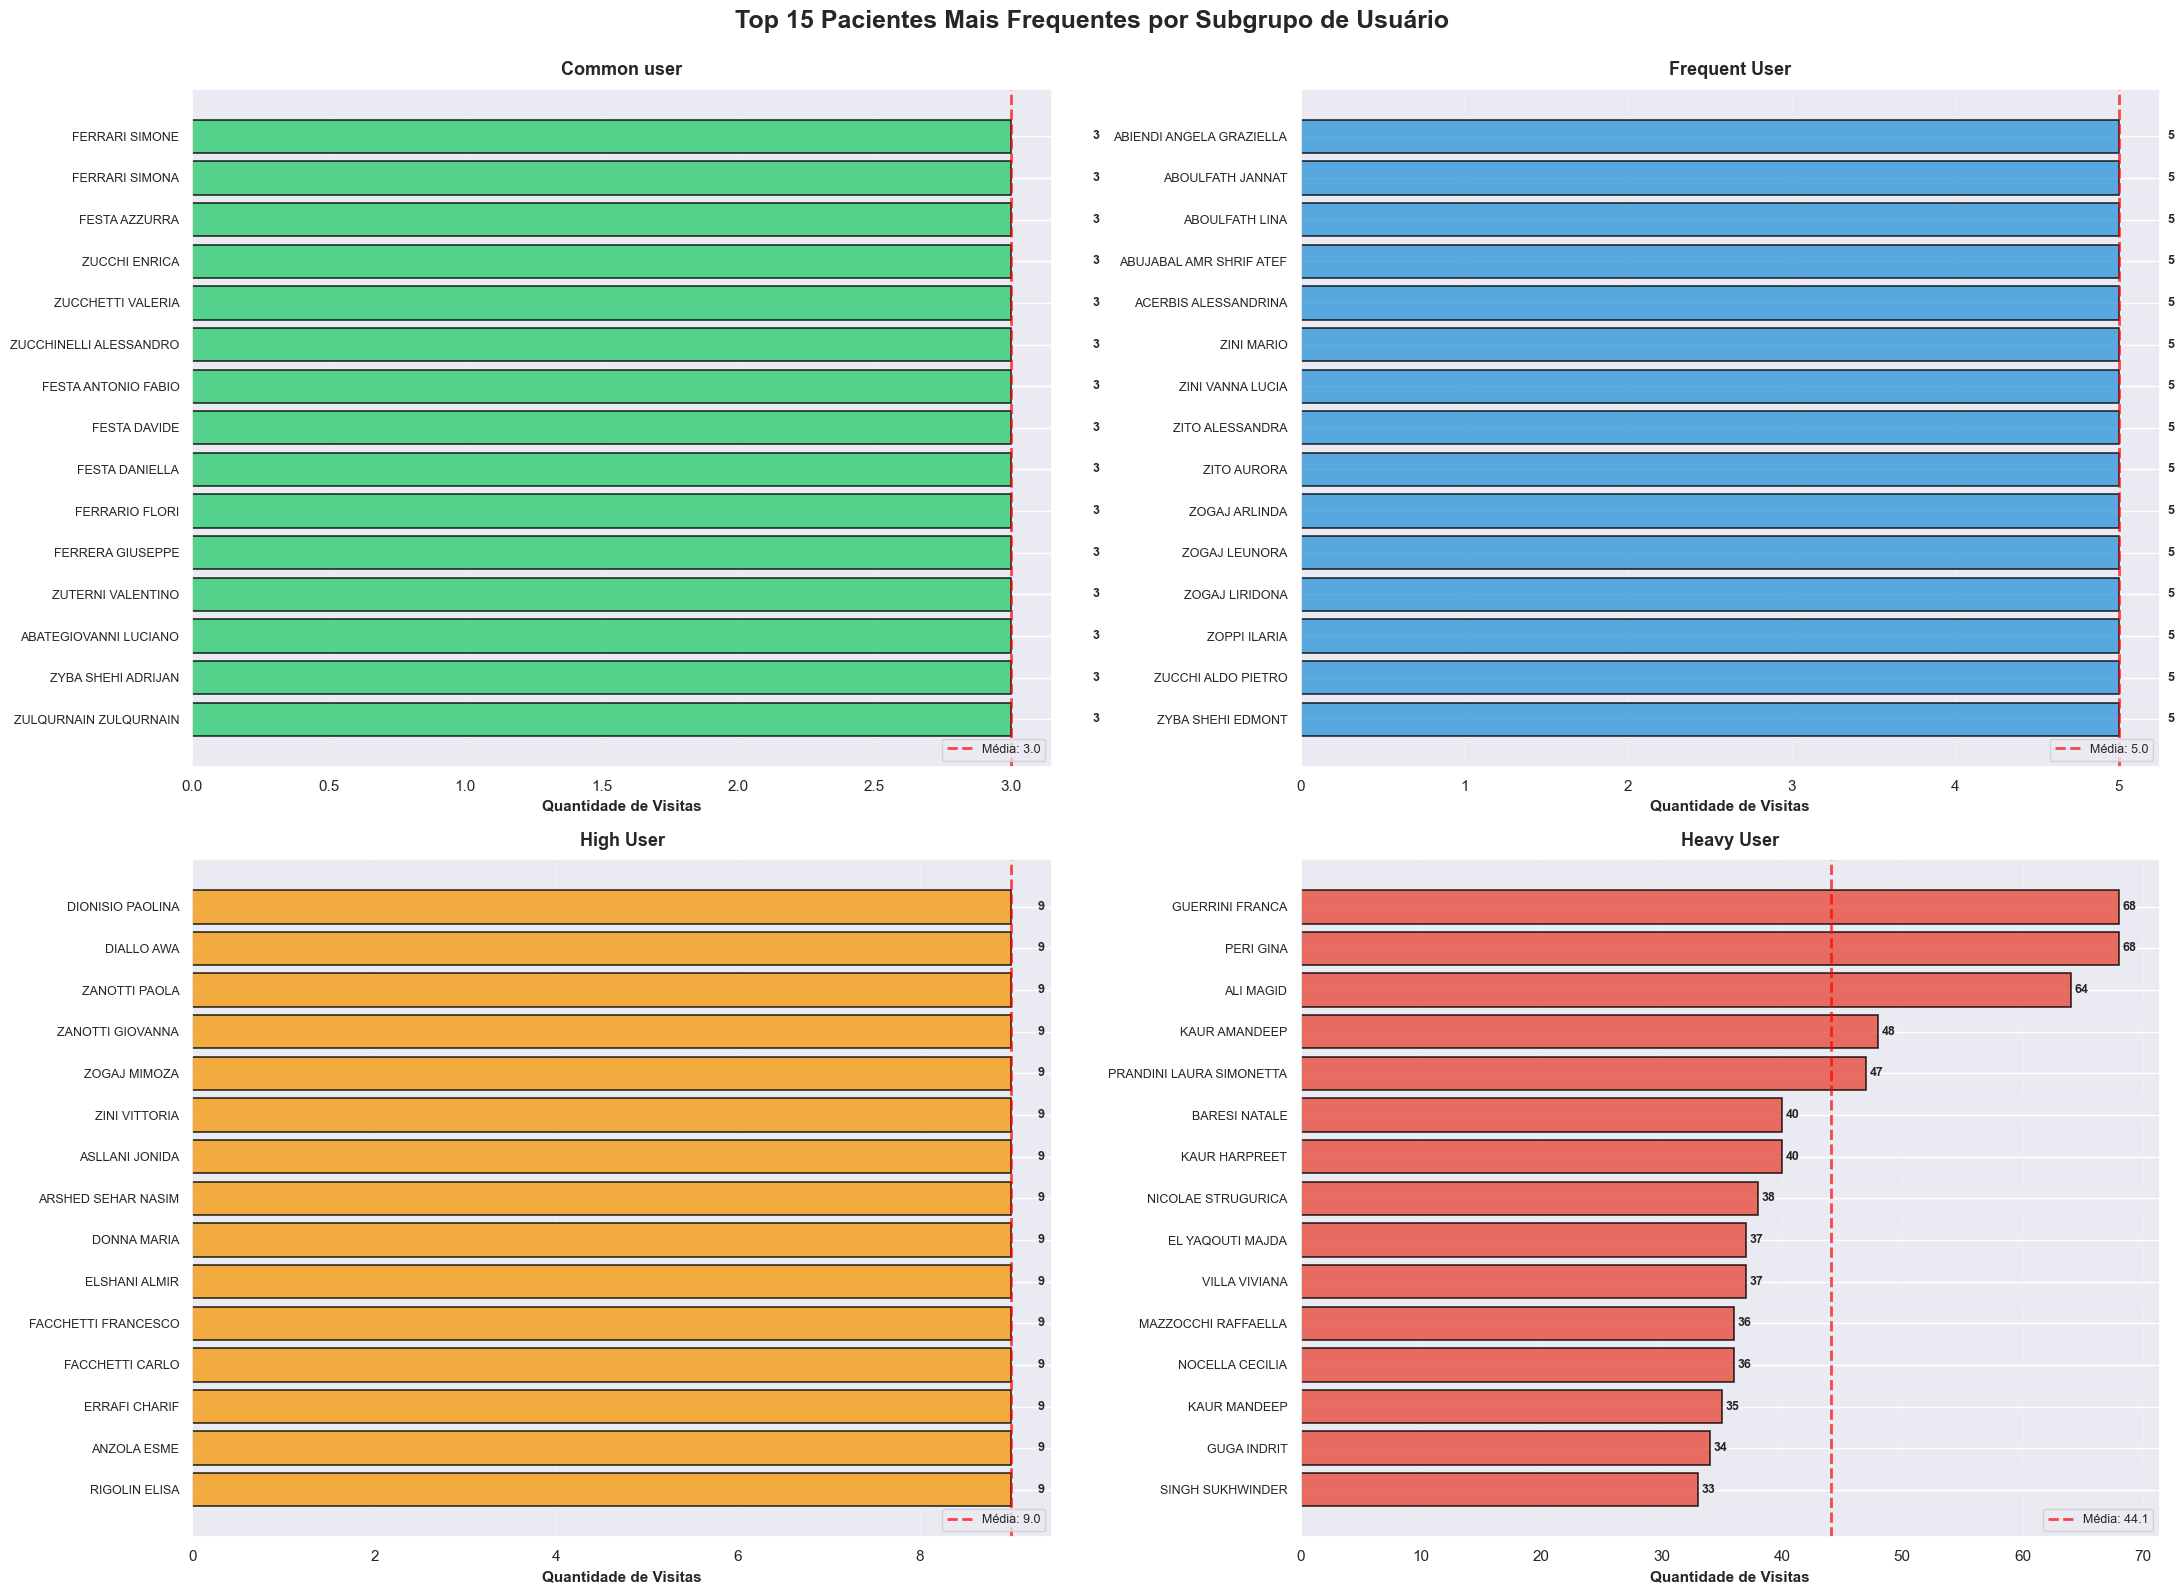

In [165]:
# Criar visualização em grid com 4 gráficos (um para cada subgrupo)
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Top 15 Pacientes Mais Frequentes por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

cores_subgrupos = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Obter dados
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    # Criar gráfico de barras horizontais
    top_pacientes_ordenado = top_pacientes.sort_values(by='Quantidade de Visitas', ascending=True)
    
    bars = ax.barh(
        range(len(top_pacientes_ordenado)), 
        top_pacientes_ordenado['Quantidade de Visitas'],
        color=cores_subgrupos[subgrupo],
        edgecolor='black',
        linewidth=1.2,
        alpha=0.8
    )
    
    # Configurar eixos
    ax.set_yticks(range(len(top_pacientes_ordenado)))
    ax.set_yticklabels(top_pacientes_ordenado.index, fontsize=9)
    ax.set_xlabel('Quantidade de Visitas', fontsize=11, fontweight='bold')
    ax.set_title(f'{subgrupo}', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_pacientes_ordenado['Quantidade de Visitas']):
        ax.text(v + 0.3, i, str(v), va='center', fontsize=9, fontweight='bold')
    
    # Adicionar linha de média
    media = top_pacientes['Quantidade de Visitas'].mean()
    ax.axvline(x=media, color='red', linestyle='--', linewidth=2, 
               label=f'Média: {media:.1f}', alpha=0.7)
    ax.legend(fontsize=9, loc='lower right')

plt.tight_layout()
plt.show()

In [166]:
# Criar tabela comparativa consolidada
print("\n" + "="*100)
print("TABELA COMPARATIVA - TOP 5 PACIENTES POR SUBGRUPO")
print("="*100 + "\n")

tabela_comparativa = pd.DataFrame()

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=5)
    top_pacientes_reset = top_pacientes.reset_index()
    top_pacientes_reset['Subgrupo'] = subgrupo
    top_pacientes_reset['Posição'] = range(1, len(top_pacientes_reset) + 1)
    
    # Reorganizar colunas
    top_pacientes_reset = top_pacientes_reset[['Posição', 'Subgrupo', 'Paziente', 'Quantidade de Visitas']]
    
    tabela_comparativa = pd.concat([tabela_comparativa, top_pacientes_reset], ignore_index=True)

display(tabela_comparativa)


TABELA COMPARATIVA - TOP 5 PACIENTES POR SUBGRUPO



,Posição,Subgrupo,Paziente,Quantidade de Visitas
0,1,Common user,ZULQURNAIN ZULQURNAIN,3
1,2,Common user,ZYBA SHEHI ADRIJAN,3
2,3,Common user,ABATEGIOVANNI LUCIANO,3
3,4,Common user,ZUTERNI VALENTINO,3
4,5,Common user,FERRERA GIUSEPPE,3
5,1,Frequent User,ZYBA SHEHI EDMONT,5
6,2,Frequent User,ZUCCHI ALDO PIETRO,5
7,3,Frequent User,ZOPPI ILARIA,5
8,4,Frequent User,ZOGAJ LIRIDONA,5
9,5,Frequent User,ZOGAJ LEUNORA,5


In [167]:
# Estatísticas resumidas por subgrupo
print("\n" + "="*100)
print("ESTATÍSTICAS RESUMIDAS POR SUBGRUPO")
print("="*100 + "\n")

estatisticas_resumo = pd.DataFrame()

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    stats = {
        'Subgrupo': subgrupo,
        'Total Pacientes': len(top_pacientes),
        'Total Visitas': top_pacientes['Quantidade de Visitas'].sum(),
        'Média Visitas': top_pacientes['Quantidade de Visitas'].mean(),
        'Mediana Visitas': top_pacientes['Quantidade de Visitas'].median(),
        'Mín Visitas': top_pacientes['Quantidade de Visitas'].min(),
        'Máx Visitas': top_pacientes['Quantidade de Visitas'].max(),
        'Desvio Padrão': top_pacientes['Quantidade de Visitas'].std()
    }
    
    estatisticas_resumo = pd.concat([estatisticas_resumo, pd.DataFrame([stats])], ignore_index=True)

# Formatar a tabela
estatisticas_resumo_formatada = estatisticas_resumo.copy()
estatisticas_resumo_formatada['Total Visitas'] = estatisticas_resumo_formatada['Total Visitas'].apply(lambda x: f'{x:,.0f}')
estatisticas_resumo_formatada['Média Visitas'] = estatisticas_resumo_formatada['Média Visitas'].apply(lambda x: f'{x:.2f}')
estatisticas_resumo_formatada['Mediana Visitas'] = estatisticas_resumo_formatada['Mediana Visitas'].apply(lambda x: f'{x:.1f}')
estatisticas_resumo_formatada['Desvio Padrão'] = estatisticas_resumo_formatada['Desvio Padrão'].apply(lambda x: f'{x:.2f}')

display(estatisticas_resumo_formatada)


ESTATÍSTICAS RESUMIDAS POR SUBGRUPO



,Subgrupo,Total Pacientes,Total Visitas,Média Visitas,Mediana Visitas,Mín Visitas,Máx Visitas,Desvio Padrão
0,Common user,15,45,3.00,3.0,3,3,0.00
1,Frequent User,15,75,5.00,5.0,5,5,0.00
2,High User,15,135,9.00,9.0,9,9,0.00
3,Heavy User,15,661,44.07,38.0,33,68,12.46


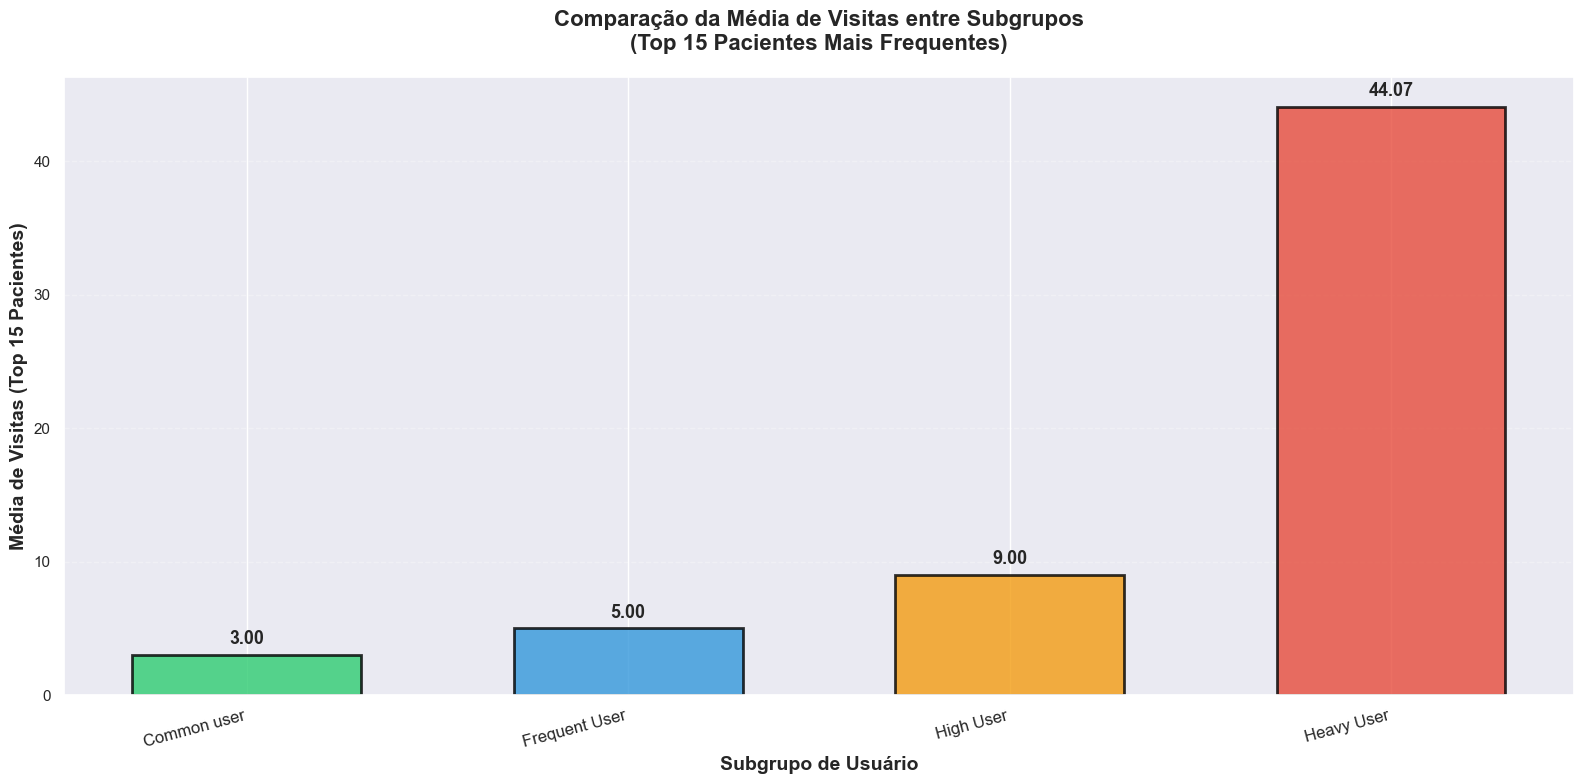


📊 INSIGHTS:
• Subgrupo com MAIOR média: Heavy User (44.07 visitas)
• Subgrupo com MENOR média: Common user (3.00 visitas)
• Diferença entre maior e menor: 41.07 visitas


In [168]:
# Gráfico de barras comparativo - Média de visitas por subgrupo (Top 15)
plt.figure(figsize=(16, 8))

medias_por_subgrupo = []
for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    medias_por_subgrupo.append(top_pacientes['Quantidade de Visitas'].mean())

x_pos = np.arange(len(subgrupos))
bars = plt.bar(x_pos, medias_por_subgrupo, 
               color=[cores_subgrupos[s] for s in subgrupos],
               edgecolor='black', linewidth=2, alpha=0.8, width=0.6)

plt.xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
plt.ylabel('Média de Visitas (Top 15 Pacientes)', fontsize=14, fontweight='bold')
plt.title('Comparação da Média de Visitas entre Subgrupos\n(Top 15 Pacientes Mais Frequentes)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(x_pos, subgrupos, fontsize=12, rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars, medias_por_subgrupo)):
    plt.text(bar.get_x() + bar.get_width()/2, valor + 0.5, 
             f'{valor:.2f}', ha='center', va='bottom', 
             fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 INSIGHTS:")
print("="*80)
print(f"• Subgrupo com MAIOR média: {subgrupos[np.argmax(medias_por_subgrupo)]} ({max(medias_por_subgrupo):.2f} visitas)")
print(f"• Subgrupo com MENOR média: {subgrupos[np.argmin(medias_por_subgrupo)]} ({min(medias_por_subgrupo):.2f} visitas)")
print(f"• Diferença entre maior e menor: {max(medias_por_subgrupo) - min(medias_por_subgrupo):.2f} visitas")
print("="*80)